# Aji Alpiansyah
# UIN Syarif HIdayatullah Jakarta

# Deskripsi Data

Cardiovascular desease (CVD) atau penyakit kardiovaskuler merupakan salah satu penyebab kematian nomor satu secara global. Diestimasikan telah merenggut nyawa sekitar 18 juta jiwa setiap tahunnya atau 31% dari seluruh penyebab kematian secara global. Empat dari lima kematian CVD diakibatkan oleh serangan jantung dan stroke, dan sepertiganya dialami secara prematur oleh sesorang dengan usia di bawah 70 tahun.

Kegagalan jantung merupakan salah salah penyebab umum dari penyakit kardiovaskuler. Sebagai seorang associate data scientist, Anda ditugaskan untuk melakukan prediksi terhadap kemungkinan terjadinya penyakit jantung. Diharapkan pemodelan yang dihasilkan dapat membantu kinerja dokter dalam mendeteksi pasien dengan penyakit jantung, sehingga dapat menolong lebih banyak orang yang berisiko tinggi terkena penyakit kardiovaskuler.

Keterangan masing-masing variabel:

*   Age: Usia pasien (tahun)
*   Sex: Jenis kelamin pasien (M: Laki-laki, F: Perempuan)
*   ChestPainType: Jenis nyeri dada (TA: Angina Tipikal, ATA: Angina Atipikal, NAP: Nyeri Non-Anginal, ASY: Asimtomatik)
*   RestingBP: Tekanan darah istirahat (mm Hg)
*   Cholesterol: Kolesterol serum (mm/dl)
*   FastingBS: Gula darah saat puasa (1: jika FastingBS > 120 mg/dl, 0: sebaliknya)
*   RestingECG: Denyut jantung maksimal istirahat (Normal: Normal, ST: memiliki abnormalitas gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV), LVH: menunjukkan hipertrofi ventrikel kiri yang mungkin atau pasti menurut kriteria Estes)
*   Exercise Angina : Mengalami Angina (Y: Ya, N: Tidak)
*   MaxHR: Denyut jantung maksimal yang dicapai (Nilai numerik antara 60 dan 202)
*   Oldpeak: Depresi ST (Nilai numerik diukur dalam depresi)
*   ST_Slope: Kemiringan segmen ST puncak latihan maksimal (Up: menanjak, Flat: datar, Down: menurun)
*   HeartDisease: Kelas output (1: penyakit jantung, 0: Normal)

# Mengimport module-module yang diperlukan

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import time
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

# 1) Mengumpulkan Data

In [2]:
# Loading Data
file_ = 'data/heart.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv
    df = pd.read_csv(file_)

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

--2023-11-18 10:24:45--  https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35902 (35K) [text/plain]
Saving to: ‘data/heart.csv’

heart.csv           100%[===================>]  35.06K  --.-KB/s    in 0.01s   

2023-11-18 10:24:45 (2.70 MB/s) - ‘data/heart.csv’ saved [35902/35902]

baris =  918 , Kolom (jumlah variabel) =  12


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


###### Data ini merupakan data sekunder yang saya ambil melalui https://github.com/arubhasy/dataset/blob/main/heart.csv
###### Data terdiri atas 918 baris dan 12 kolom (variabel)

# 2) Menelaah Data

In [3]:
# Memeriksa tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


###### Data ini terdiri atas 12 variabel, dengan 11 variabel prediktor dan 1 variabel target (HeartDisease).
###### Terdapat 2 variabel bertipe float, 5 variabel bertipe object, dan 5 variabel bertipe int64
###### Terdapat beberapa missing values di variabel, yakni variabel Age dan Sex

In [4]:
# assign data yang tipenya object ke suatu variabel
varObjects = df.select_dtypes(include = ['object'])
varObjects.head()

# mengubah tipe variabel 'object' ke 'category'
for col in varObjects.columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(2), int64(5)
memory usage: 55.5 KB


###### Pada line code diatas, saya melakukan pengubahan tipe data pada seluruh variabel yang bertipe 'object' ke variabel bertipe 'category'.

In [5]:
#mengubah tipe variabel 'fastingBS' dan 'HeartDisease' ke 'category
df['FastingBS'] = df['FastingBS'].astype('category')
df['HeartDisease'] = df['HeartDisease'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(2), int64(3)
memory usage: 43.2 KB


###### Pada line code diatas, saya melakukan pengubahan tipe data pada variabel 'FastingBS' dan 'HeartDisease' menjadi variabel bertipe 'object'.

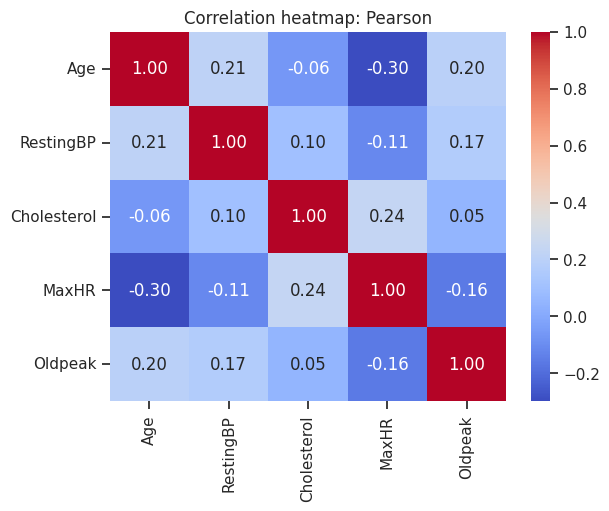

In [6]:
vp_df = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']].dropna().copy()

# Chart
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)

    # Heatmap
    sns.heatmap(vp_df.corr(method='pearson', numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation heatmap: Pearson')
    plt.show()

###### Berdasarkan heatmap correlation yang telah kita peroleh, didapat:
###### Hubungan tiap variabel prediktor relatif rendah satu sama lain
###### Korelasi tertinggi berada pada variabel MaxHR dan Age dengan hubungan terbalik sebesar -0,30
###### Korelasi terendah berada pada variabel Cholesterol dan Oldpeak dengan hubungan searah sebesar 0,05

In [7]:
# Visual Python: Data Analysis > Sweetviz
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 73.6 MB/s eta 0:00:00


In [8]:
# Visual Python: Data Analysis > Sweetviz
import sweetviz

                                             |          | [  0%]   00:00 -> (? left)


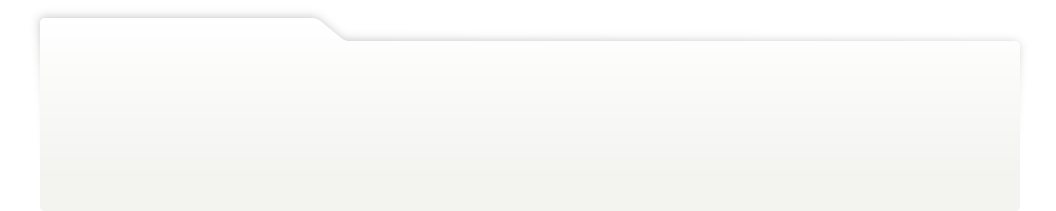
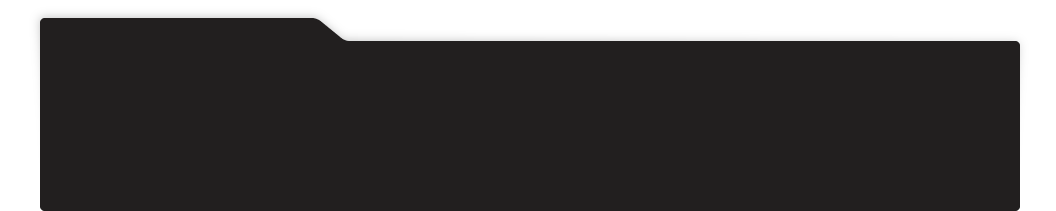
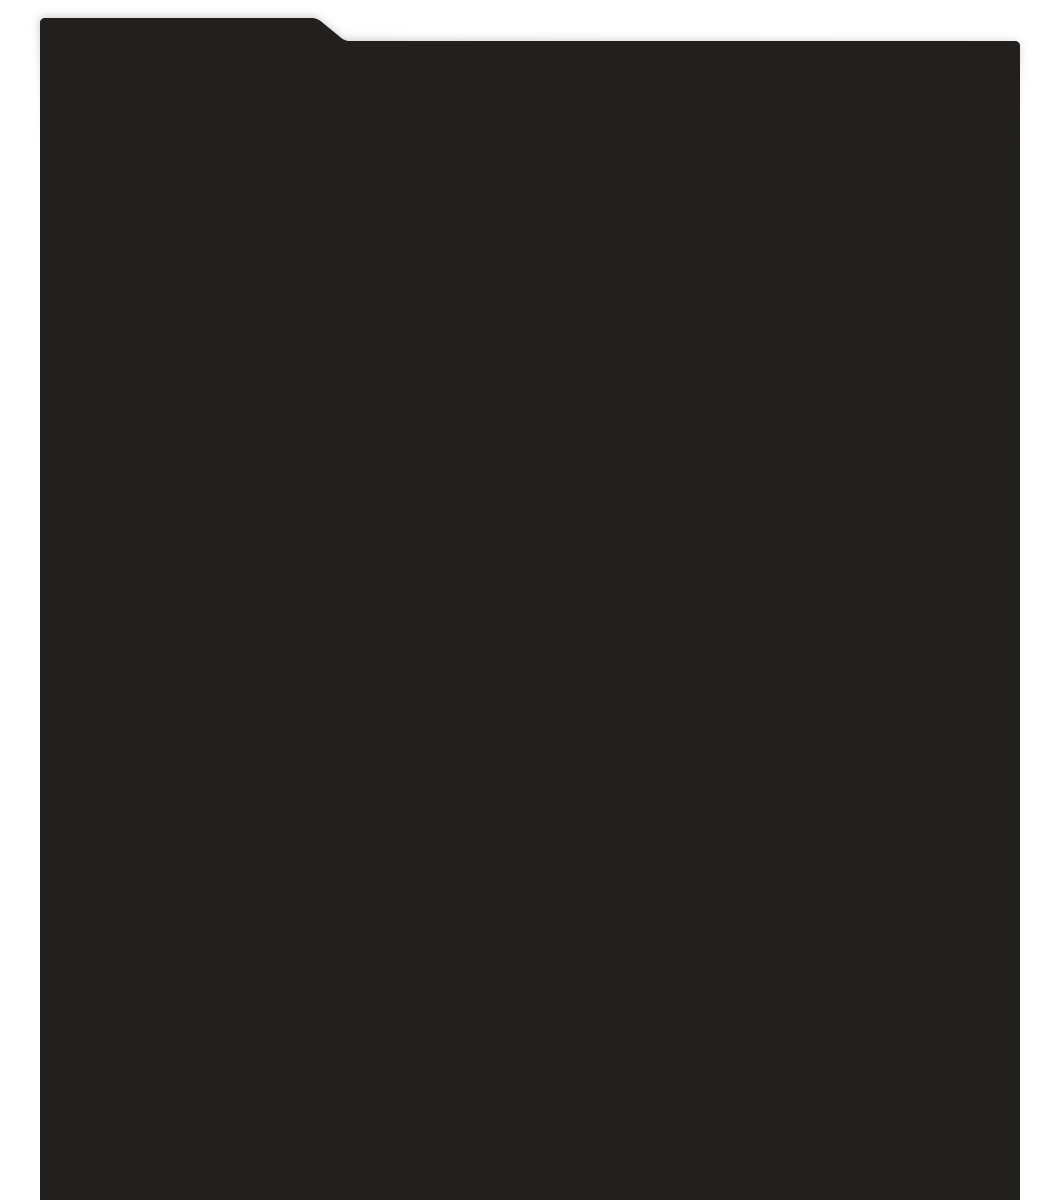
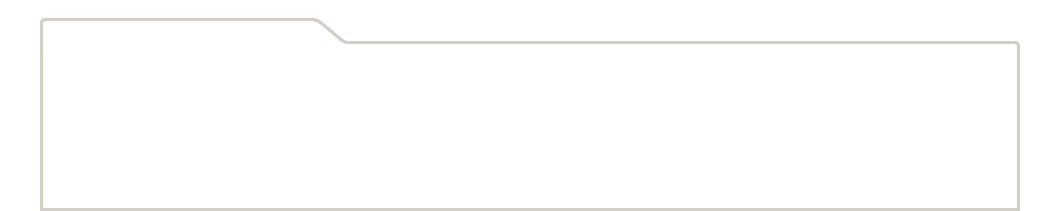
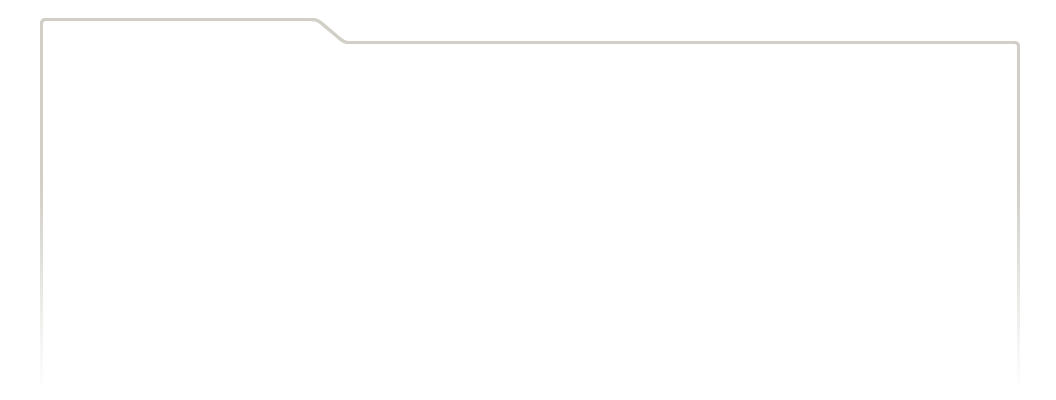
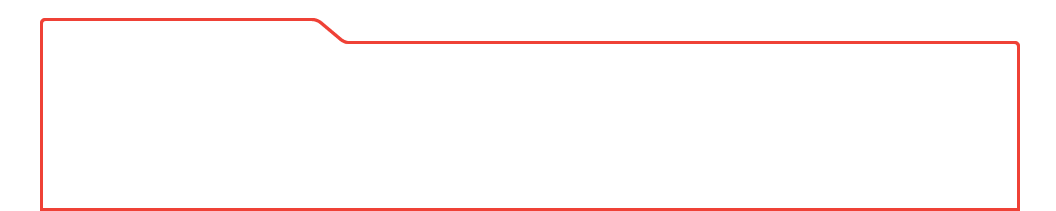
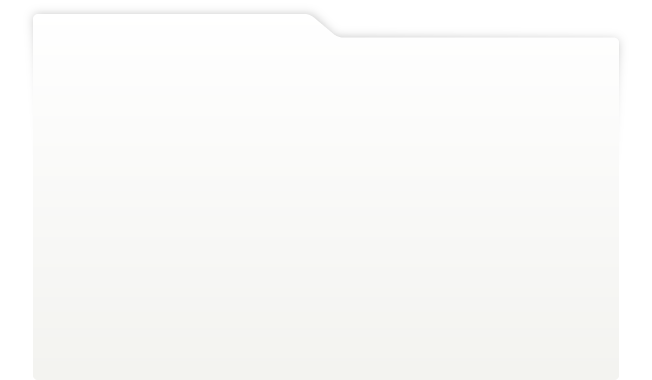
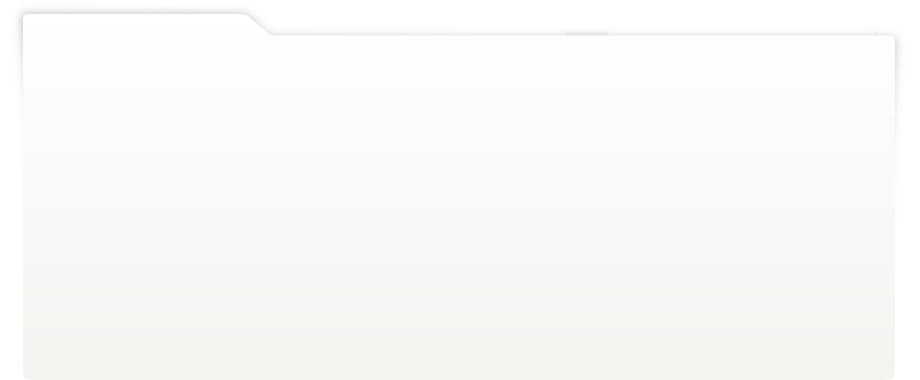
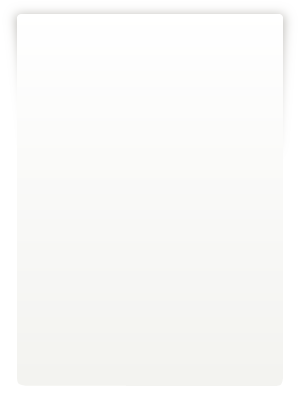
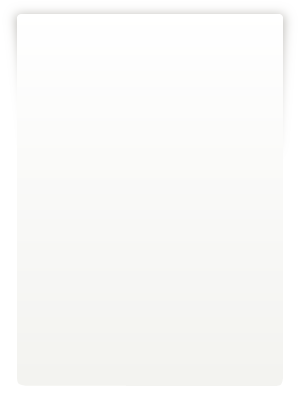
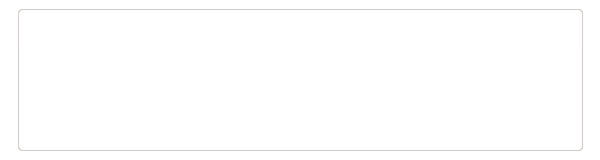
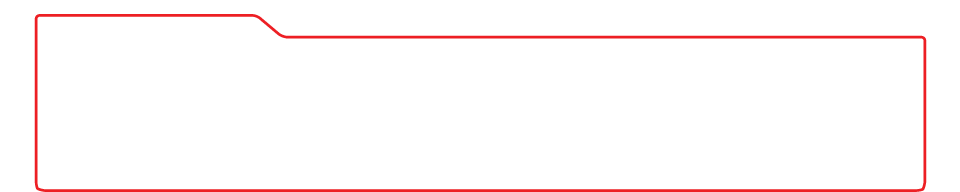
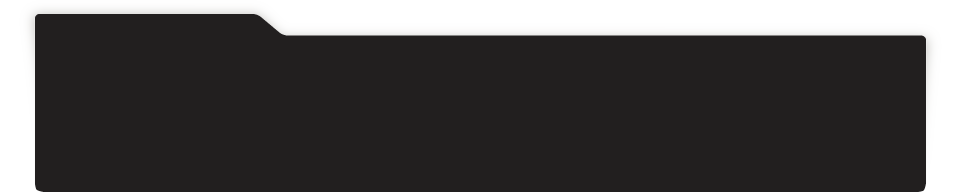
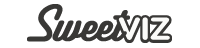
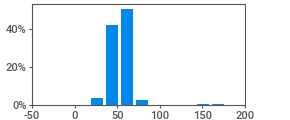
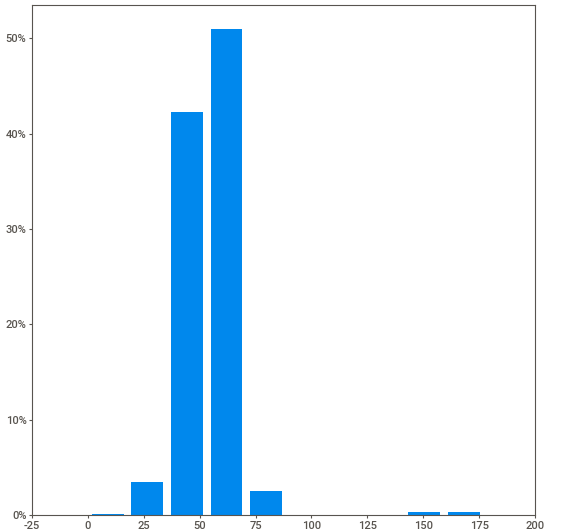
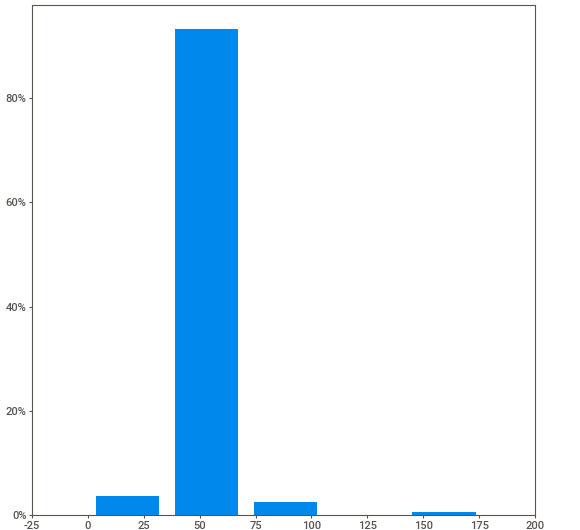
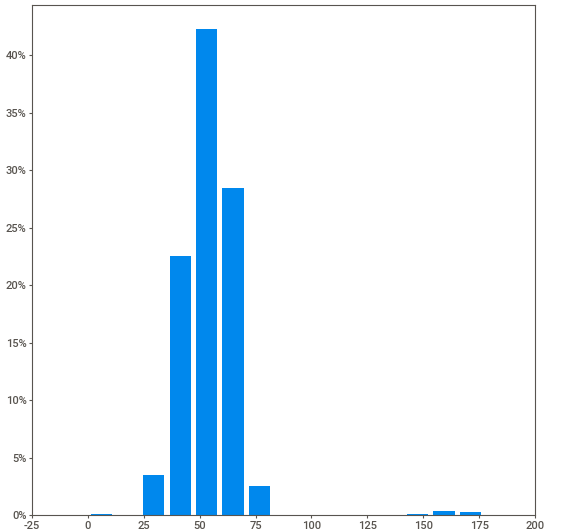
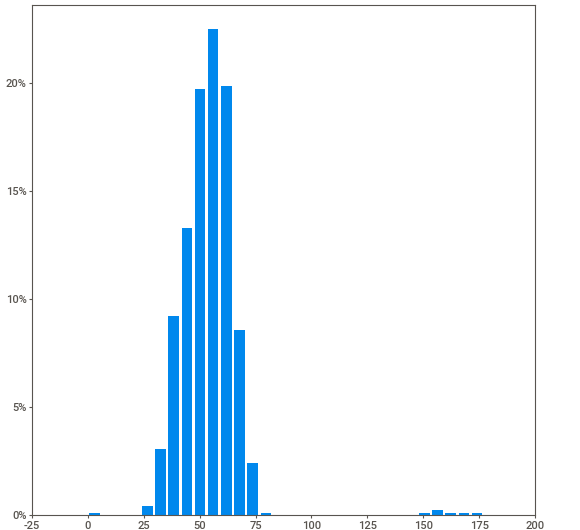
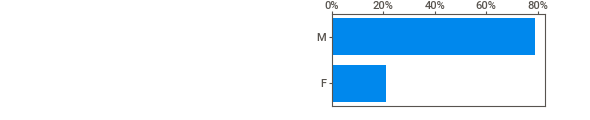
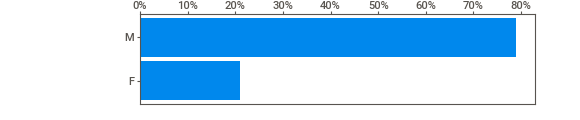
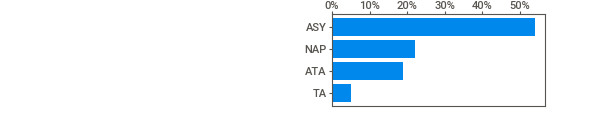
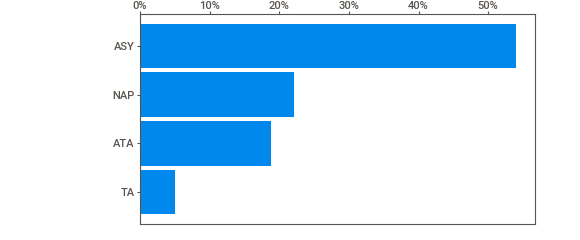
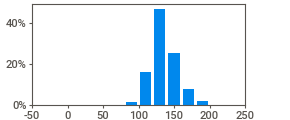
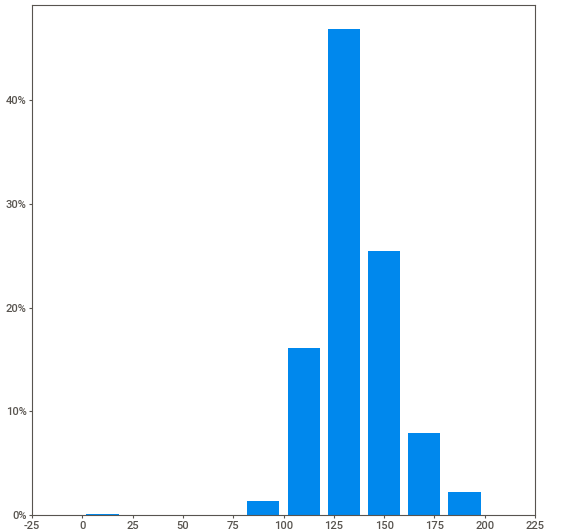
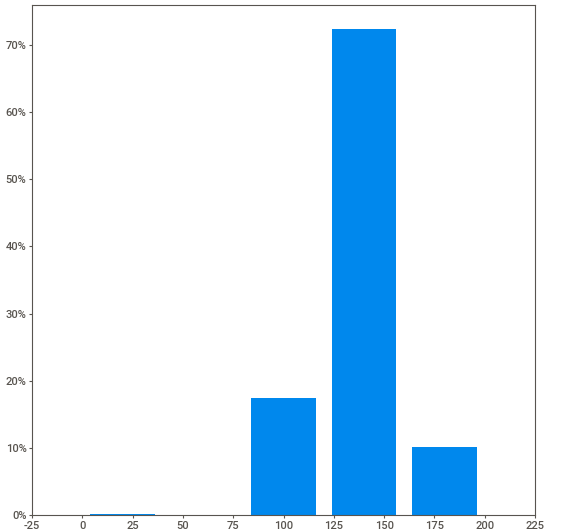
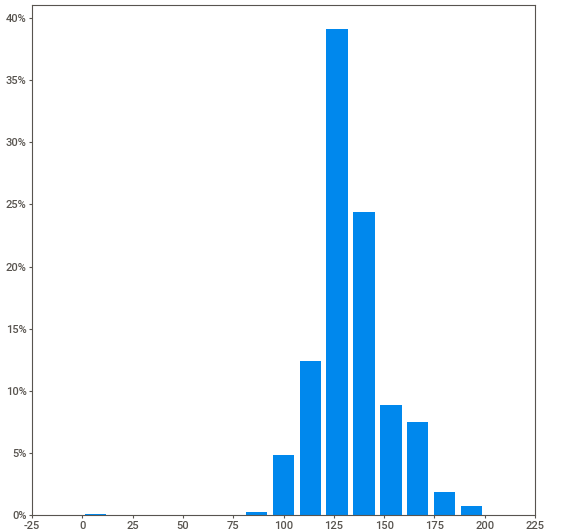
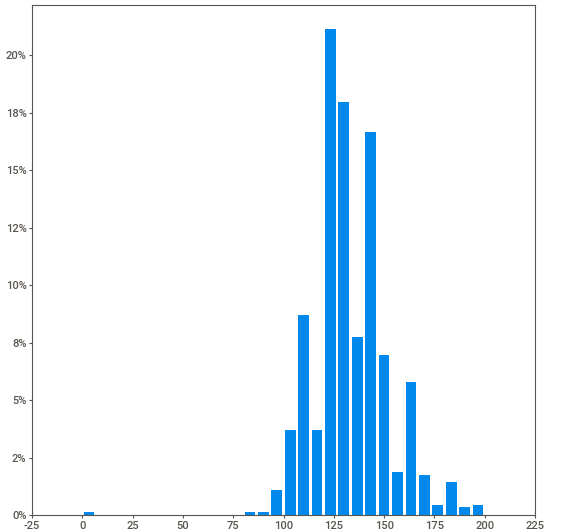
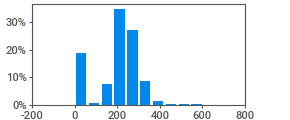
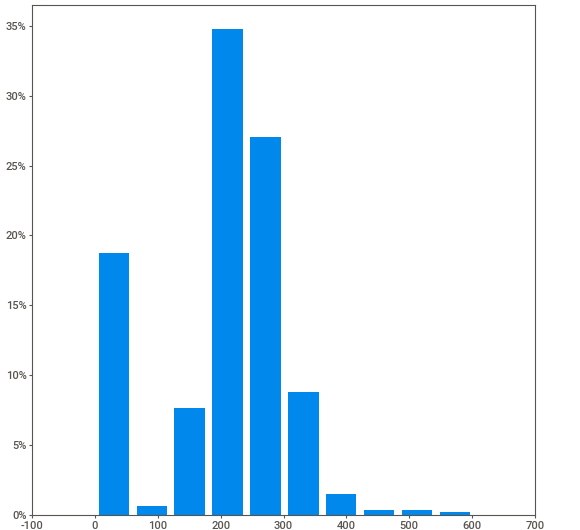
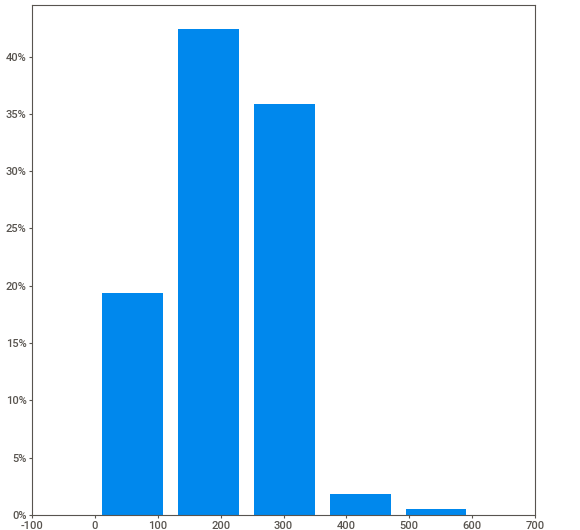
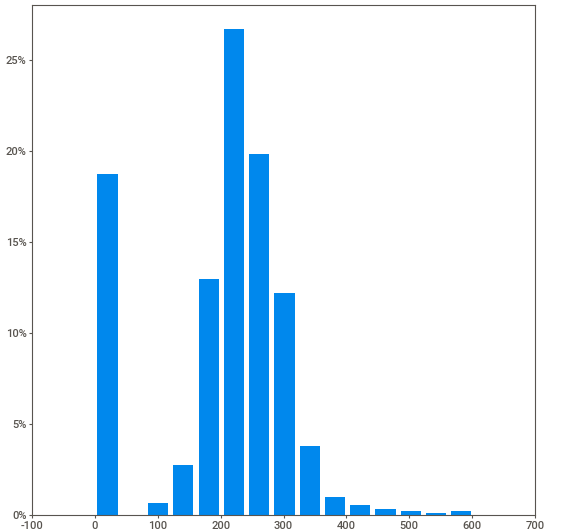
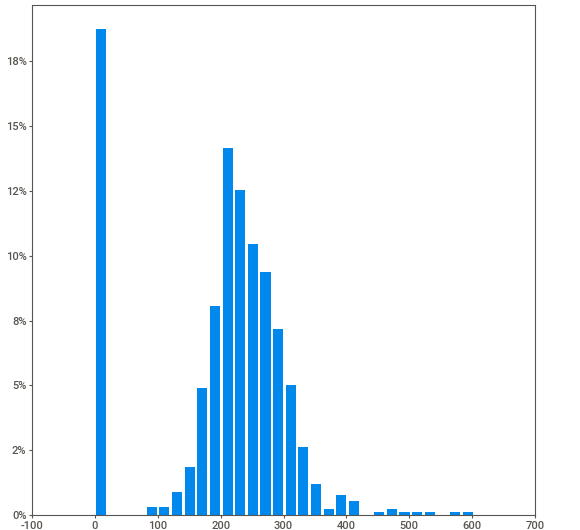
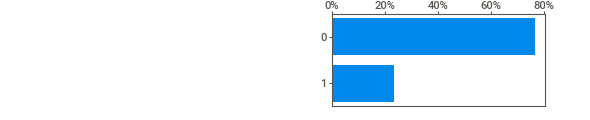
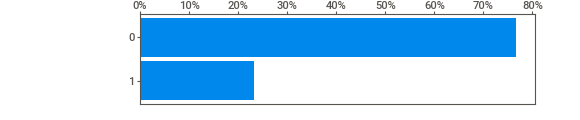
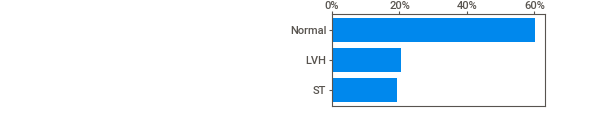
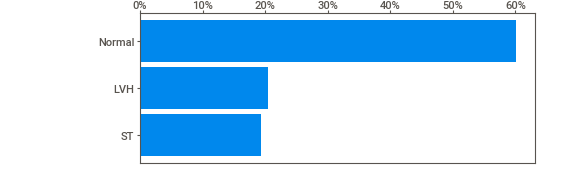
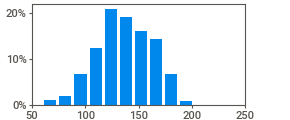
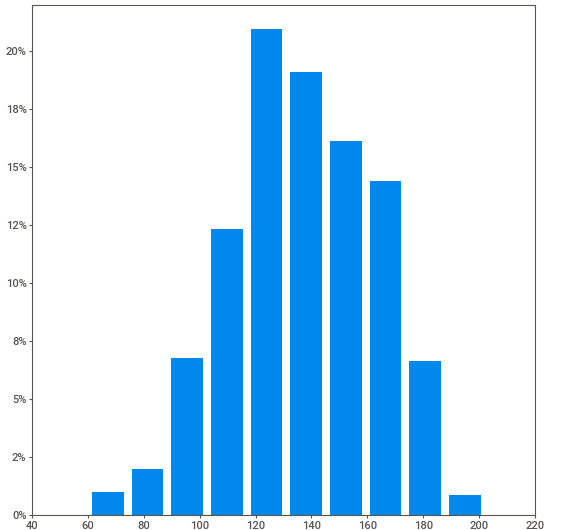
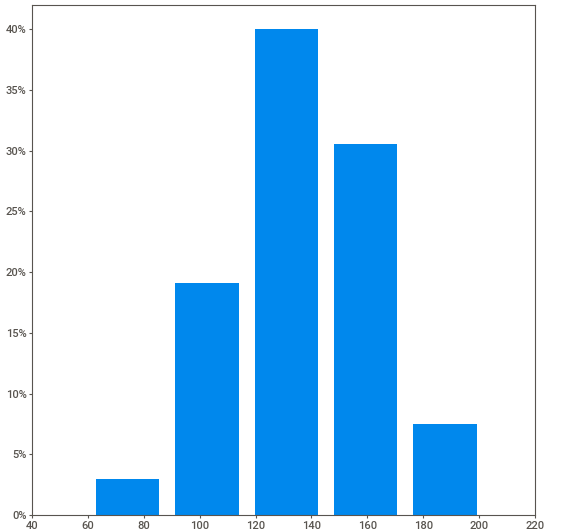
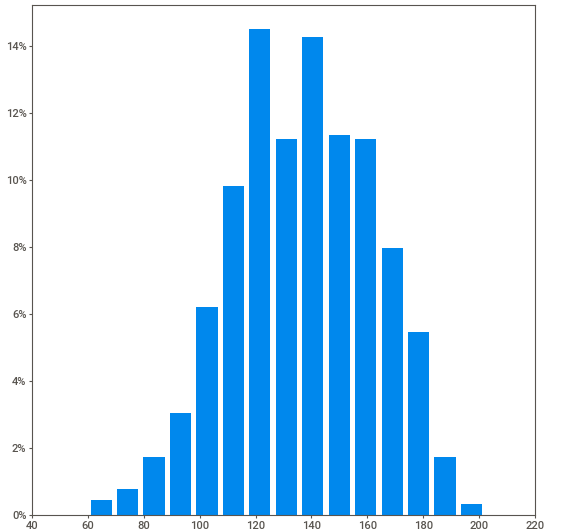
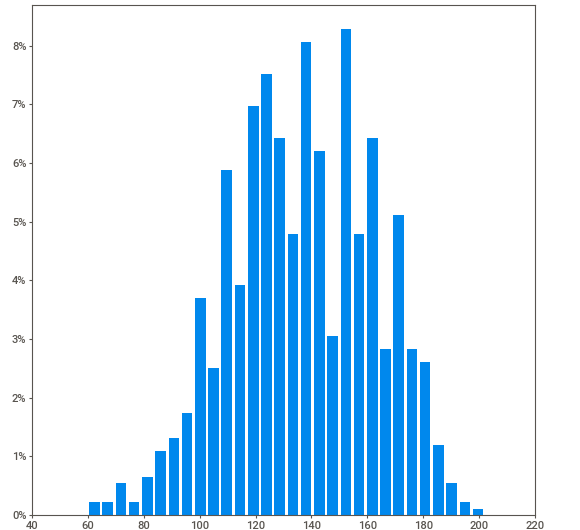
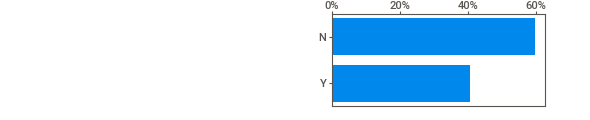
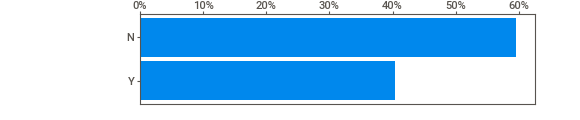
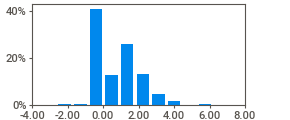
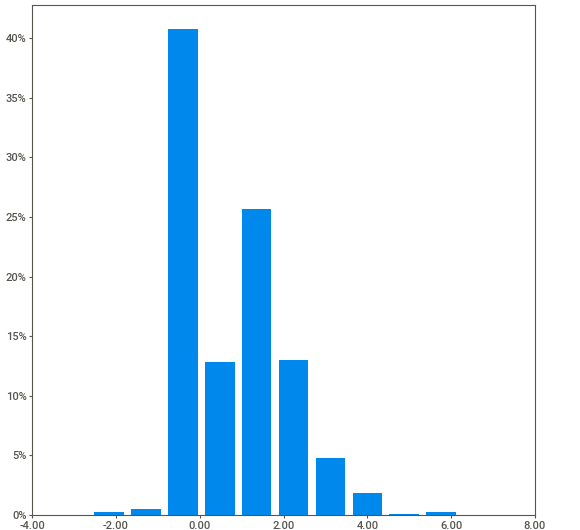
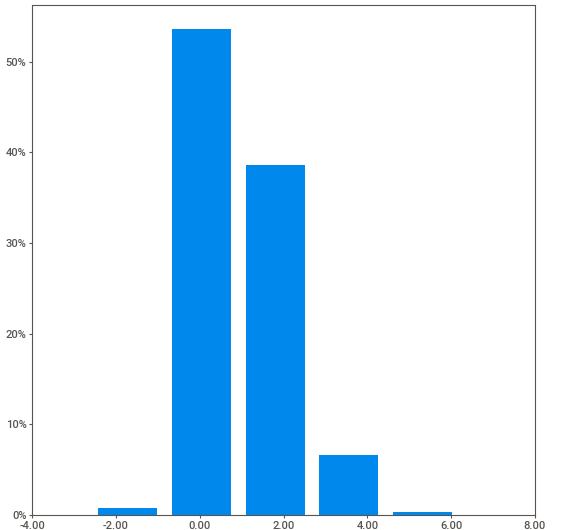
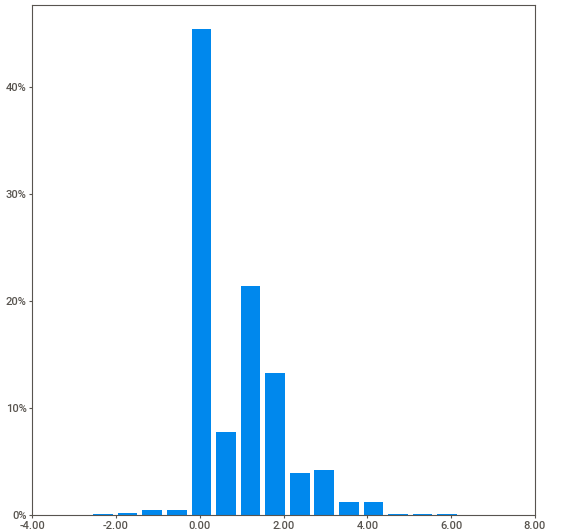
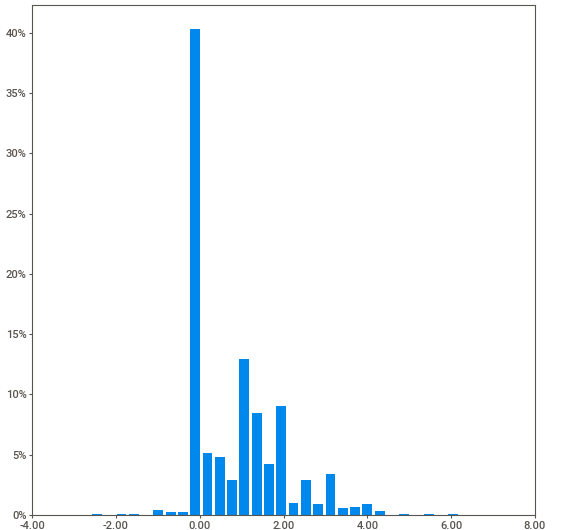
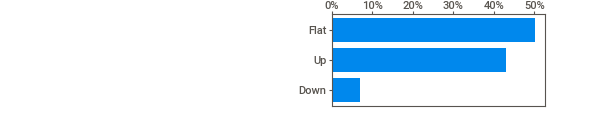
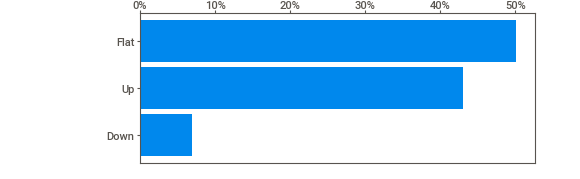
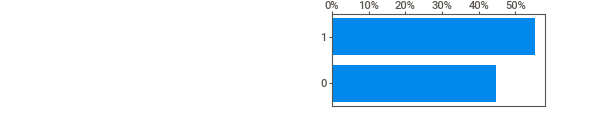
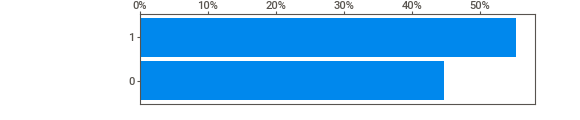
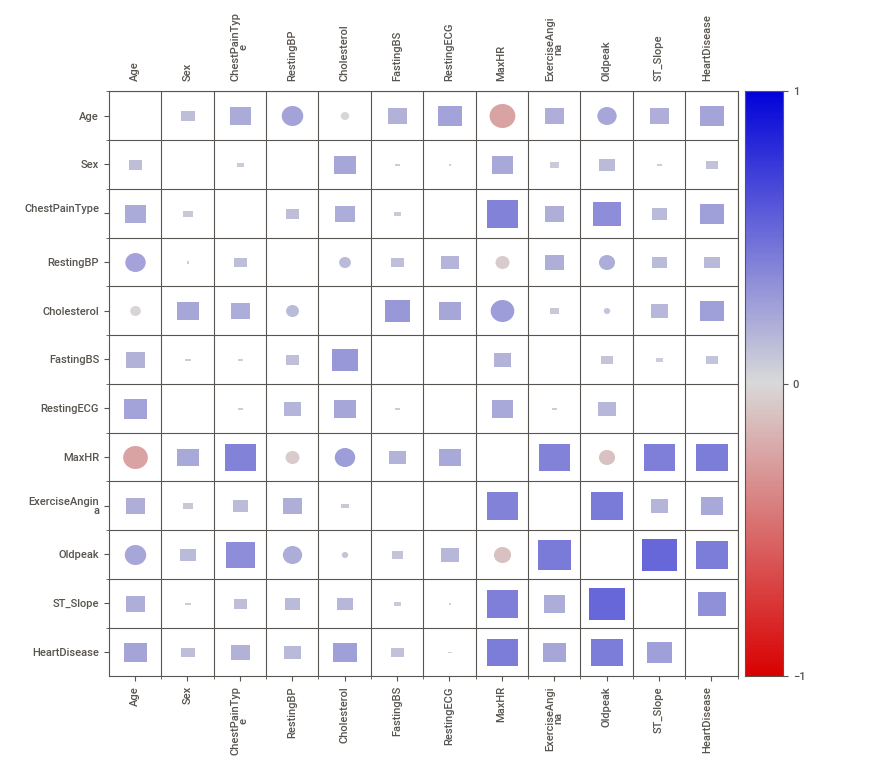
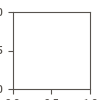

In [9]:
# Visual Python: Data Analysis > Sweetviz
report = sweetviz.analyze([df, 'laporan_penelaahan_data'])
report.show_notebook()
report

###### Berdasarkan visualisasi diatas diperoleh:
###### 1.) Terdapat missing values pada variabel Age dan Sex masing-masing sebesar 7 dan 2.
###### 2.) Pada variabel Age diperoleh rata-rata sebesar 54 dan standar deviasi sebesar 13.
###### 3.) Pada variabel Sex diperoleh kategori yang sering muncul adalah Male
###### 4.) Pada variabel ChestPainType diperoleh kategori yang sering muncul adalah ASY dan proporsi data yang kurang seimbang
###### 5.) Pada variabel FastingBS diperoleh kategori yang sering muncul adalah 1
###### 6.) Pada variabel RestingECG diperoleh kategori yang sering muncul adalah Normal
###### 7.) Pada variabel ExerciseAngina diperoleh kategori yang sering muncul adalah N dan proporsi data cukup seimbang
###### 8.) Pada variabel ST_Slop diperoleh kategori yang sering muncul adalah Flat
###### 9.) Pada variabel RestingBP diperoleh rata-rata sebesar 132 dan standar deviasi sebesar 18,5.
###### 10.) Pada variabel Cholesterol diperoleh rata-rata sebesar 199 dan standar deviasi sebesar 109.
###### 11.) Pada variabel MaxHR diperoleh rata-rata sebesar 137 dan standar deviasi sebesar 25,5 dan cenderung berdistribusi normal.
###### 12.) Pada variabel Oldpeak diperoleh rata-rata sebesar 0,89 dan standar deviasi sebesar 1,07.

# 3 dan 4) Memvalidasi Data dan Menentukan Objek Data

###### Berdasarkan heatmap correlation yang telah kita peroleh sebelumnya, diperoleh:
###### (Saya menggunakan threshold nilai korelasi sebesar 0,8 untuk menentukan besar atau kecilnya hubungan antar variabel.)
###### 1.) Dapat dilihat korelasi antar variabel prediktor tidak memiliki nilai yang lebih dari 0,8 (hubungan yang kuat). Maka setiap variabel prediktor dapat digunakan dalam model.
###### Berdasarkan alasan tersebut, saya menggunakan seluruh fitur prediktor sebanyak 11 fitur pada model saya (tidak ada yang saya seleksi)

# 5.) Membersihkan Data

In [10]:
# menampilkan statistika deskriptif
df.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,911.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,136.809368,0.887364
std,12.988393,18.514154,109.384145,25.460334,1.066570
min,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,177.000000,200.000000,603.000000,202.000000,6.200000


###### Berdasarkan tabel diatas, diperoleh:
###### nilai Age = 177 dan Age = 0 merupakan nilai yang tidak wajar, maka kita asumsikan data tersebut adalah noise.
###### nilai RestingBP = 0 merupakan nilai yang tidak wajar, maka kita asumsikan data tersebut adalah noise.
###### nilai Cholesterol = 0 merupakan nilai yang tidak wajar, maka kita asumsikan data tersebut adalah noise.
###### nilai Oldpeak negatif merupakan nilai yang tidak wajar, maka kita asumsikan data tersebut adalah noise.

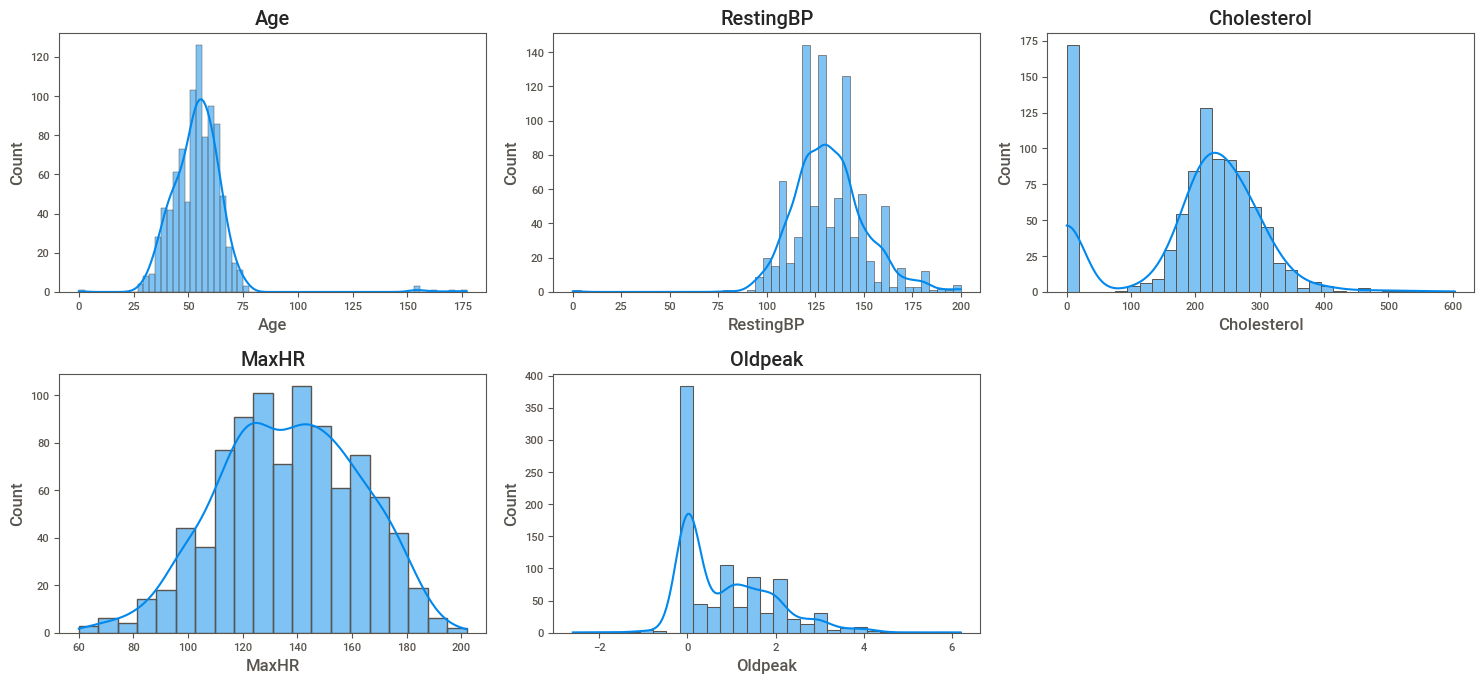

In [11]:
# memeriksa noise pada data variabel numerik menggunakan histogram
df_numerik = df.select_dtypes(include = ['float64', 'int64'])

plt.figure(figsize=(15, 10))

for col in df_numerik.columns:
  plt.subplot(3, 3, df_numerik.columns.get_loc(col) + 1)
  sns.histplot(data=df, x=col, kde=True)
  plt.title(col)

plt.tight_layout()
plt.show()

###### Berdasarkan tabel diatas diperoleh:
###### 1.) Terdapat nilai yang tak wajar pada variabel Age, yakni nilai 0 dan nilai yang lebih dari 100
###### 2.) Terdapat nilai yang tak wajar pada variabel Resting BP, yakni nilai 0
###### 3.) Terdapat nilai yang tak wajar pada variabel Cholesterol, yakni nilai 0
###### 4.) Terdapat nilai yang tak wajar pada variabel Oldpeak, yakni nilai negatif

In [12]:
df.loc[(df.Age == 0) | (df.Age >= 100)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
74,155.0,M,ASY,140,268,0,Normal,128,Y,1.5,Flat,1
329,0.0,M,ASY,130,0,1,ST,130,Y,1.1,Down,1
389,161.0,M,ASY,160,0,1,ST,145,N,1.0,Flat,1
447,177.0,M,ASY,124,171,0,ST,110,Y,2.0,Up,1
626,153.0,M,ASY,142,226,0,LVH,111,Y,0.0,Up,0
687,170.0,M,ATA,156,245,0,LVH,143,N,0.0,Up,0
707,154.0,M,ASY,124,266,0,LVH,109,Y,2.2,Flat,1


###### Berdasarkan output diatas, jumlah data yang memiliki nilai Age = 0 atau Age = 100 tidaklah banyak, yakni 7.

In [13]:
df.loc[(df.RestingBP == 0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55.0,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


###### Berdasarkan output diatas, jumlah data yang memiliki nilai RestingBP = 0 tidaklah banyak, yakni hanya 1.

In [14]:
# mengubah umur yang lebih dari 100 menjadi Nan
df['Age'] = df['Age'].apply(lambda x: np.nan if x > 100 else x)

###### Pada line code diatas, saya ingin mengubah nilai Age>100 menjadi missing value untuk ditangani setelahnya.

In [15]:
# mengubah oldpeak yang nilainya minus menjadi Nan
df['Oldpeak'] = df['Oldpeak'].apply(lambda x: np.nan if x < 0 else x)

###### Pada line code diatas, saya ingin mengubah nilai Oldpeak yang negatif menjadi missing value untuk ditangani setelahnya.

In [16]:
#ubah ke missing value
df['Age'] = df['Age'].replace(to_replace=0, value=np.nan) #jumlahnya 1
df['RestingBP'] = df['RestingBP'].replace(to_replace=0, value=np.nan) #jumlahnya 1
df['Cholesterol'] = df['Cholesterol'].replace(to_replace=0, value=np.nan)

###### Pada line code diatas, saya ingin mengubah nilai Age=0, RestingBP=0, dan Cholesterol=0 menjadi missing value untuk ditangani setelahnya.

In [17]:
#periksa banyaknya missing value
print(df.isnull().sum())

Age                14
Sex                10
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak            13
ST_Slope            0
HeartDisease        0
dtype: int64


###### Setelah kita mengubah beberapa Noise menjadi missing values, maka terdapat penambahan missing values pada beberapa variabel. Adapun detailnya:
###### Age = 14
###### Sex = 10
###### RestingBP = 1
###### Cholesterol = 172
###### Oldpeak = 13

In [18]:
#Persentase missing value dari tiap variabel
(df.isnull().sum()/len(df)*100).to_frame('persentase missing')

,persentase missing
Age,1.525054
Sex,1.089325
ChestPainType,0.000000
RestingBP,0.108932
Cholesterol,18.736383
FastingBS,0.000000
RestingECG,0.000000
MaxHR,0.000000
ExerciseAngina,0.000000
Oldpeak,1.416122


###### Berdasarkan tabel diatas,
###### 1.) Persentase missing value dari variabel Age, Sex, Oldpeak, dan RestingBP tidak terlalu besar proporsinya, maka kita dapat menghapus data tersebut.
###### 2.) Persentase missing value dari variabel Cholesterol cukup besar proporsinya, maka kita dapat mengimputasi missing value tersebut dengan rata-rata dikarenakan variabel cholesterol mengikuti distribusi normal

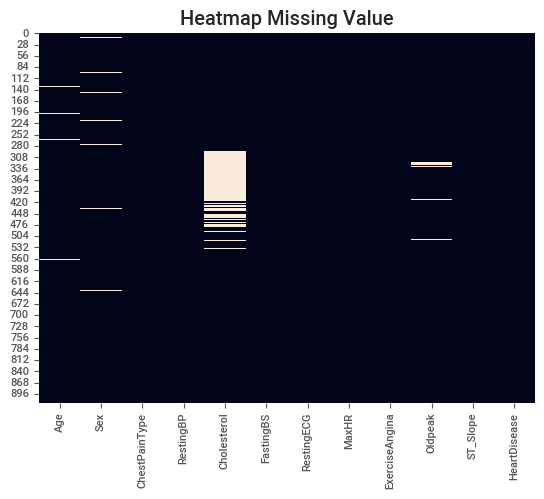

In [19]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

###### Berdasarkan heatmap di atas, dapat dilihat bahwa missing value terjadi secara random, maka hal ini memperkuat tindakan diperbolehkannya penghapusan dan imputasi.

In [20]:
#mengganti missing value di variabel cholesterol dengan meannya
print(df.isnull().sum())

df["Cholesterol"].fillna(df["Cholesterol"].mean(), inplace = True)

print('\n\n',df.isnull().sum())

Age                14
Sex                10
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak            13
ST_Slope            0
HeartDisease        0
dtype: int64


 Age               14
Sex               10
ChestPainType      0
RestingBP          1
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak           13
ST_Slope           0
HeartDisease       0
dtype: int64


###### Pada line code diatas, saya melakukan imputasi missing value pada variabel cholesterol dengan mean. Dapat dilihat hasil setelah imputasi missing value pada variabel cholesterol menjadi 0.

In [21]:
#menghapus missing value pada variabel Age, RestingBP, Sex, dan Oldpeak
df.dropna(subset=['Age','RestingBP','Sex', 'Oldpeak'], inplace=True)
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


###### Setelah kita imputasi missing values pada variabel cholesterol, selanjutnya kita melakukan deletion untuk missing values pada variabel Age, Sex, RestingBP, dan Oldpeak karena jumlahnya yang sedikit.

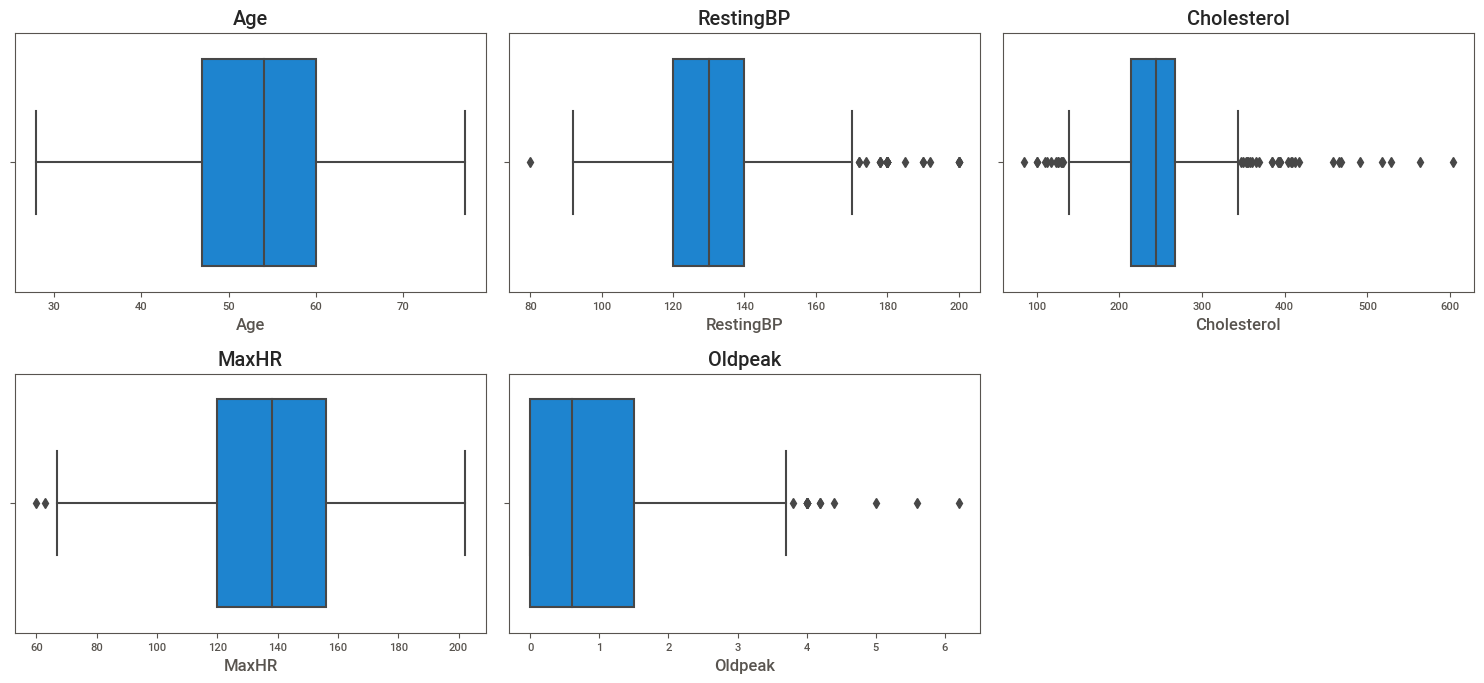

In [22]:
#membuat boxplot
plt.figure(figsize=(15, 10))

for col in df_numerik.columns:
  plt.subplot(3, 3, df_numerik.columns.get_loc(col) + 1)
  sns.boxplot(data=df, x=col)
  plt.title(col)

plt.tight_layout()
plt.show()

###### Terdapat Outlier pada variabel RestingBP, MaxHR, Cholesterol, dan Oldpeak. Namun, karena outlier extreme hanya terdapat pada Cholesterol dan Oldpeak, maka saya hanya menangani outlier pada variabel Cholesterol dan Oldpeak.

Q1=214.0, Q3=267.0, IQR=53.0


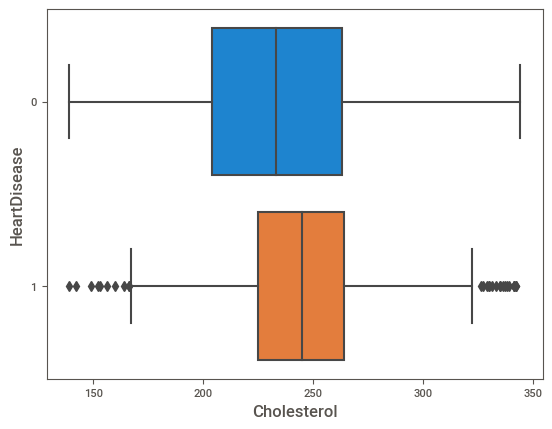

Q1=0.0, Q3=1.5, IQR=1.5


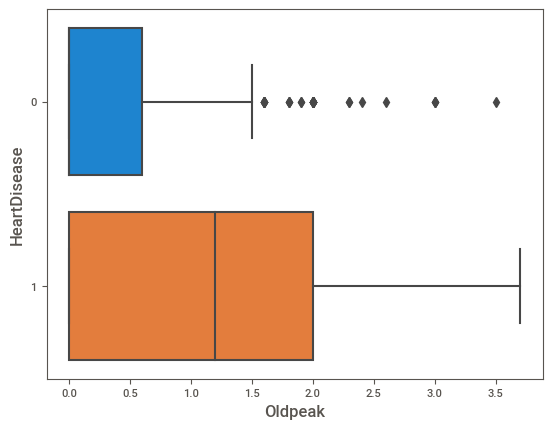

In [23]:
columns_to_plot = ["Cholesterol", "Oldpeak"]
#menghapus outlier pada variabel cholesterol dan Oldpeak
for col in columns_to_plot:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

  df.drop(df[(df[col] < Q1-1.5*IQR) | (df[col] > Q3+1.5*IQR)].index, inplace=True)
  p = sns.boxplot(x=col, y="HeartDisease", data=df)
  plt.show()

###### Pada line diatas, saya melakukan deletion pada outlier di variabel Cholesterol dan Oldpeak karena model yang saya gunakan nantinya sensitif terhadap adanya outlier yang extreme. Dapat dilihat bahwa setelah dilakukan penghapusan pada outlier ternyata masih menyisakan outlier, namun kita abaikan outlier tersebut dengan asumsi outliernya sudah tidak se-extreme sebelumnya.

In [24]:
#Pengecekan noise pada variabel kategori
catVar = df.select_dtypes(include = ['category'])

for col in catVar.columns:
    print(col,': ', set(df[col].unique()))

Sex :  {'F', 'M'}
ChestPainType :  {'TA', 'NAP', 'ASY', 'ATA'}
FastingBS :  {0, 1}
RestingECG :  {'Normal', 'LVH', 'ST'}
ExerciseAngina :  {'N', 'Y'}
ST_Slope :  {'Down', 'Up', 'Flat'}
HeartDisease :  {0, 1}


###### Tidak terdapat noise pada variabel kategorik

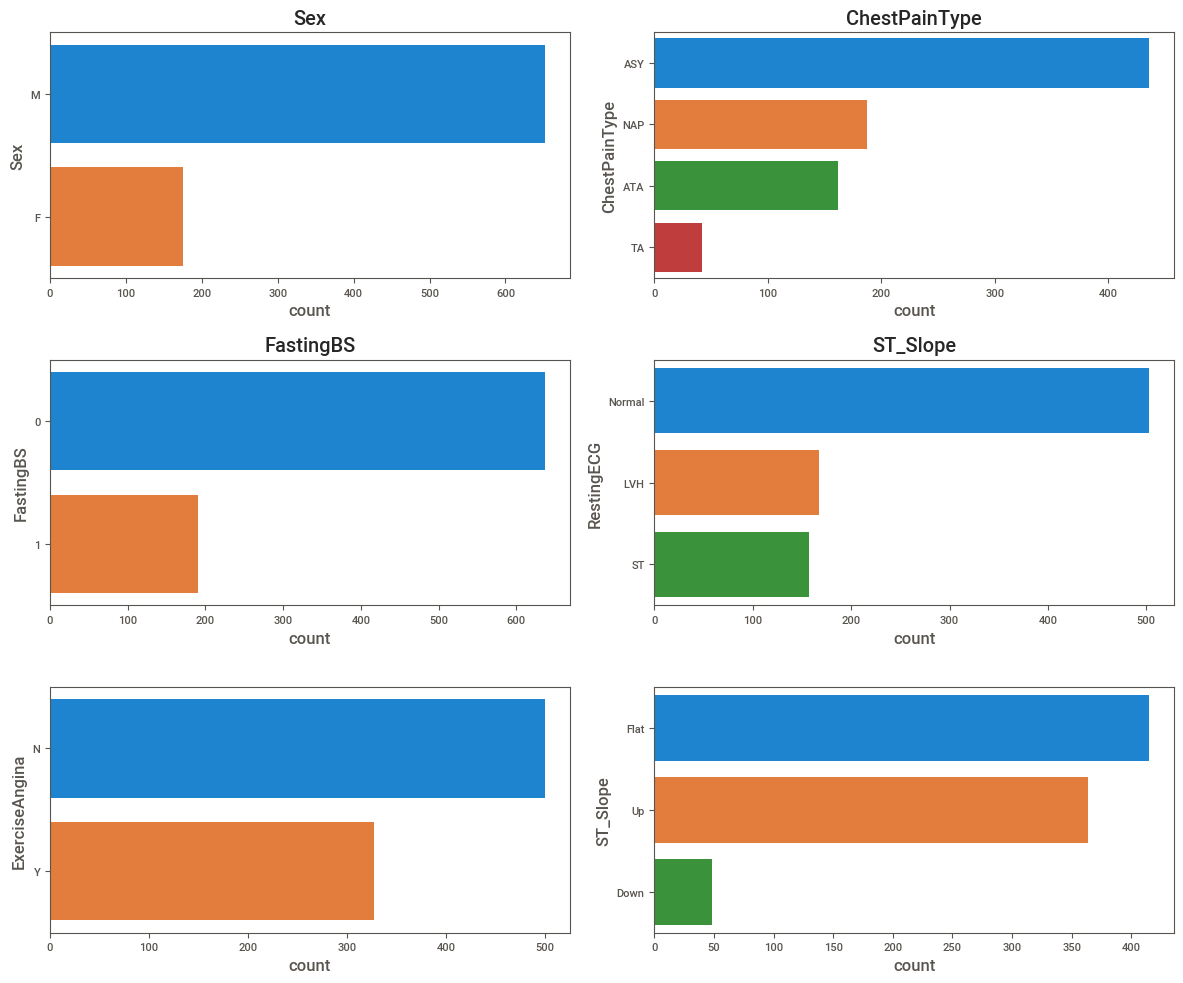

In [25]:
# Membuat subplots dengan 3 baris dan 2 kolom
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Plot pertama
sns.countplot(data=df, y='Sex', order=df['Sex'].value_counts(ascending=False).index, ax=axes[0, 0])
axes[0, 0].set_title('Sex')

# Plot kedua
sns.countplot(data=df, y='ChestPainType', order=df['ChestPainType'].value_counts(ascending=False).index, ax=axes[0, 1])
axes[0, 1].set_title('ChestPainType')

# Plot ketiga
sns.countplot(data=df, y='FastingBS', order=df['FastingBS'].value_counts(ascending=False).index, ax=axes[1, 0])
axes[1, 0].set_title('FastingBS')

# Plot keempat
sns.countplot(data=df, y='RestingECG', order=df['RestingECG'].value_counts(ascending=False).index, ax=axes[1, 1])
axes[1, 1].set_title('RestingECG')

# Plot kelima
sns.countplot(data=df, y='ExerciseAngina', order=df['ExerciseAngina'].value_counts(ascending=False).index, ax=axes[2, 0])
axes[1, 1].set_title('ExerciseAngina')

# Plot keenam
sns.countplot(data=df, y='ST_Slope', order=df['ST_Slope'].value_counts(ascending=False).index, ax=axes[2, 1])
axes[1, 1].set_title('ST_Slope')

# Mengatur layout
plt.tight_layout()

# Menampilkan plot
plt.show()

###### Berdasarkan diagram batang diatas, proporsi kategori TA kecil dibandingkan dengan kategori lain pada kategori ChestPainType. Karena perbedaan proporsi yang besar dapat mempengaruhi model, maka saya menanganinya dengan menggabungkan kategori TA dan kategori ATA (masih masuk akal berasarkan business understanding)

In [26]:
#Mengganti kategori ATA menjadi TA
df['ChestPainType'] = df['ChestPainType'].replace(to_replace='ATA', value='TA')

###### Pada line code diatas, saya melakukan penggabungan variabel ATA menjadi variabel TA karena berdasarkan proses business understanding hal ini mungkin untuk dilakukan.

In [27]:
#memeriksa data duplikat
print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())
df[df.duplicated() == True].head()

(827, 12)
jumlah data yang duplikat 0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


###### Tidak terdapat data duplikat

                                             |          | [  0%]   00:00 -> (? left)


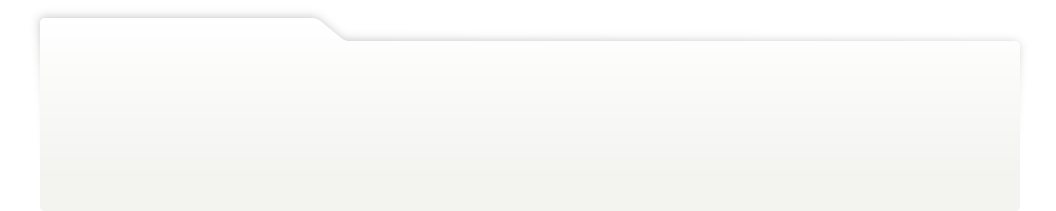
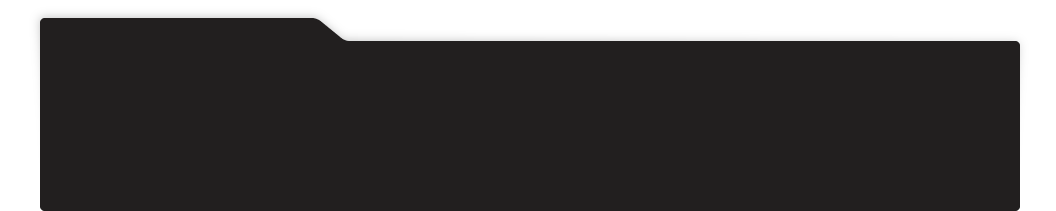
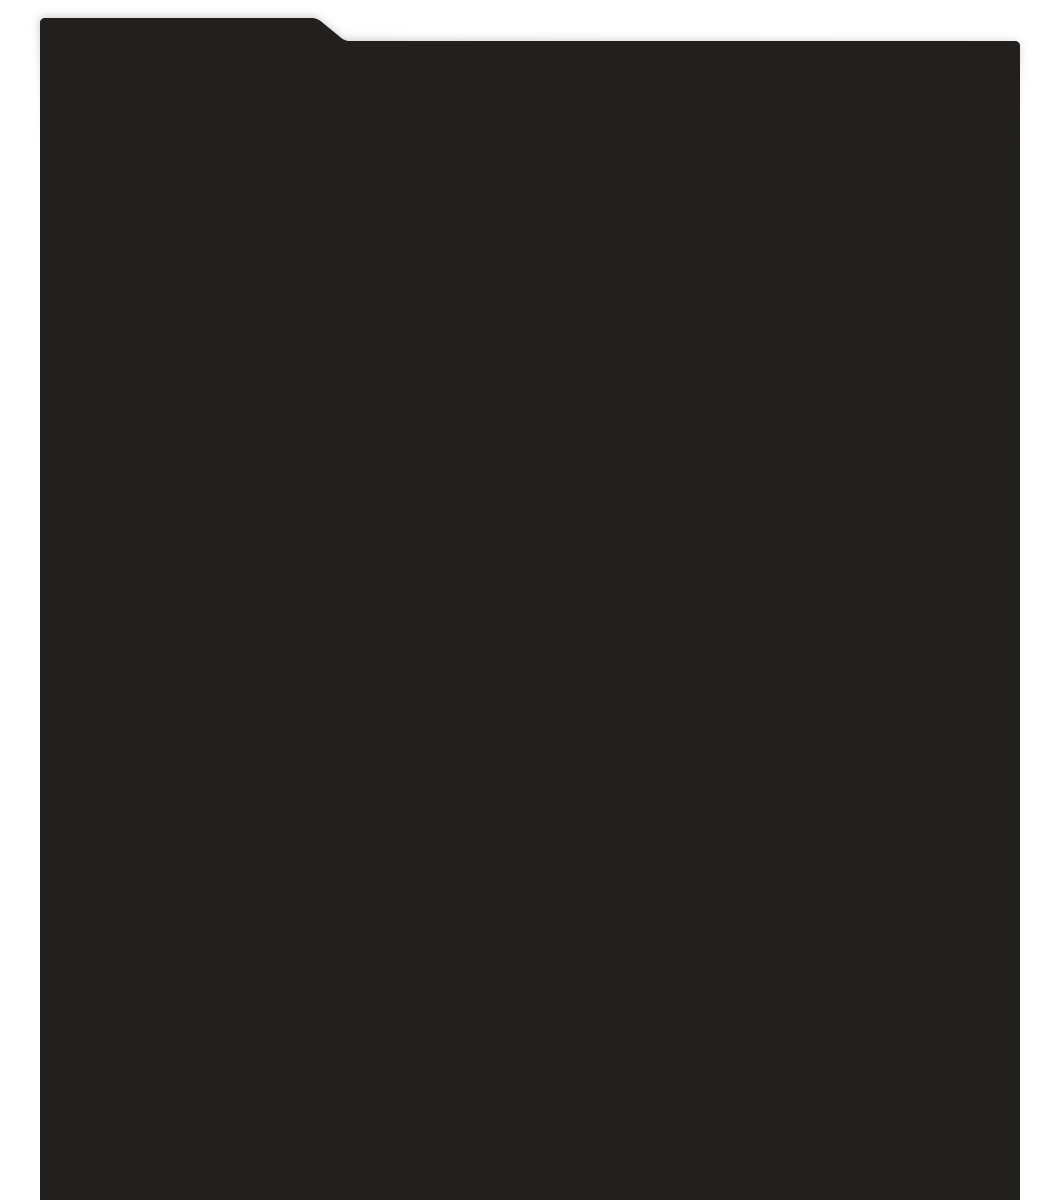
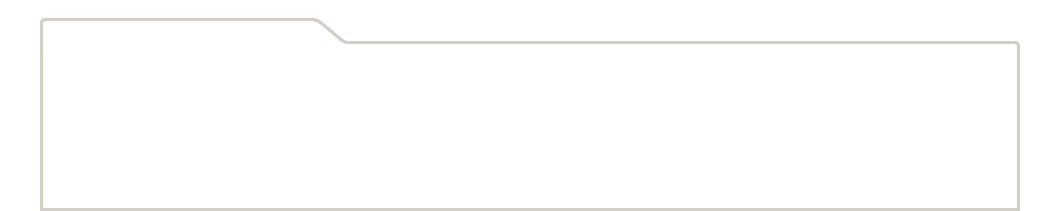
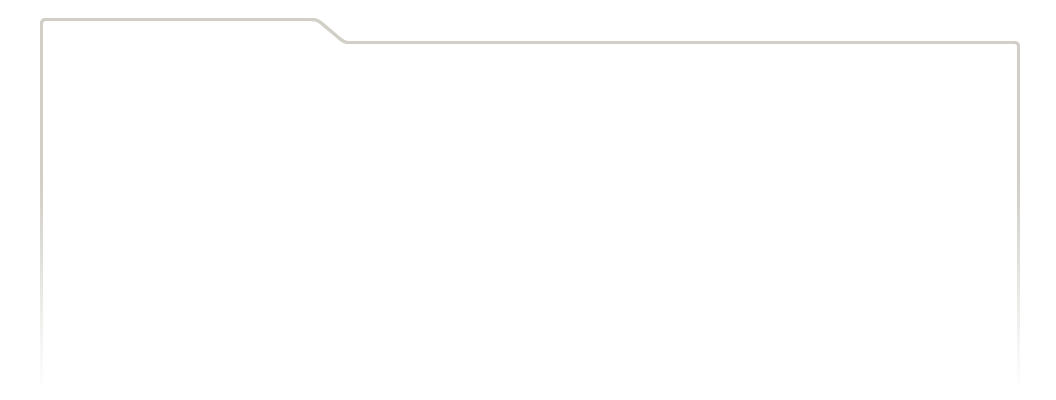
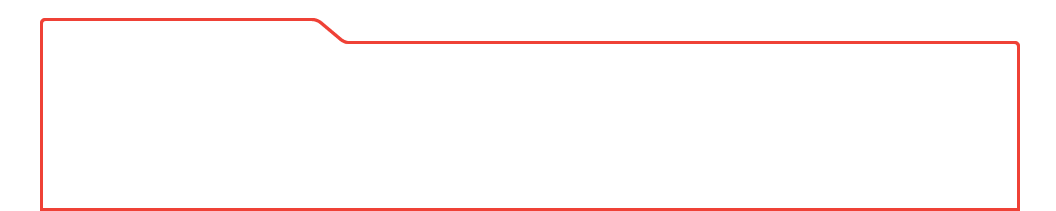
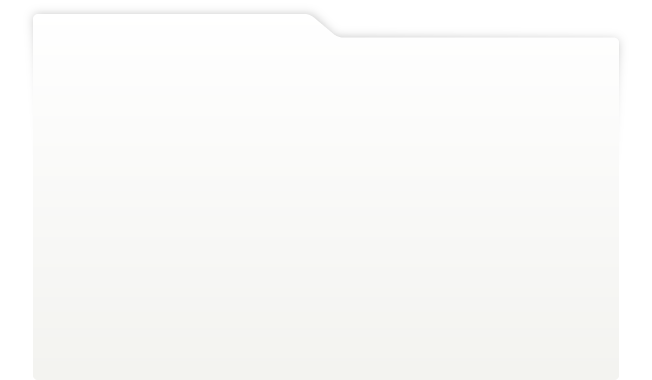
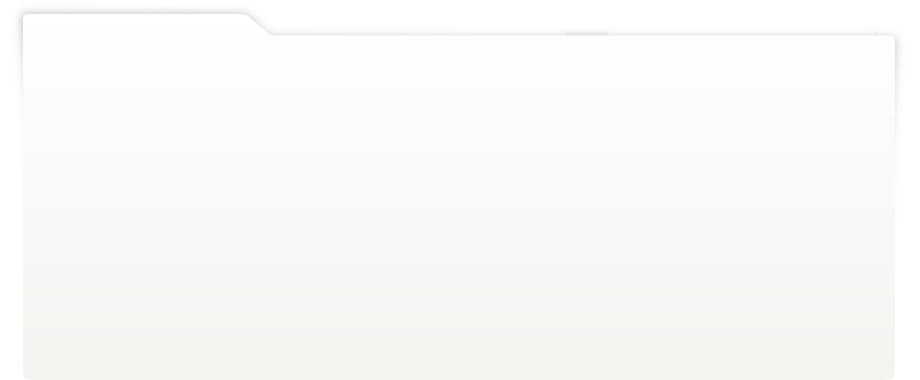
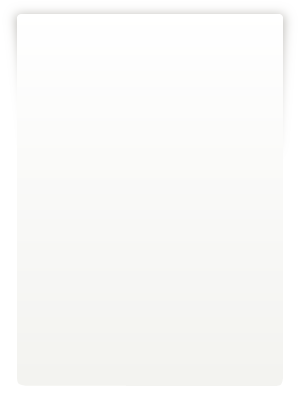
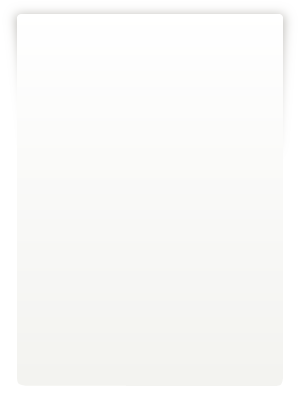
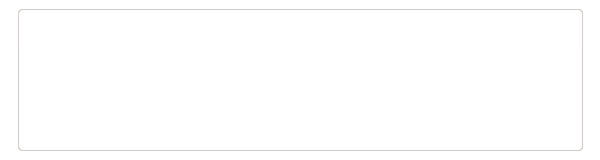
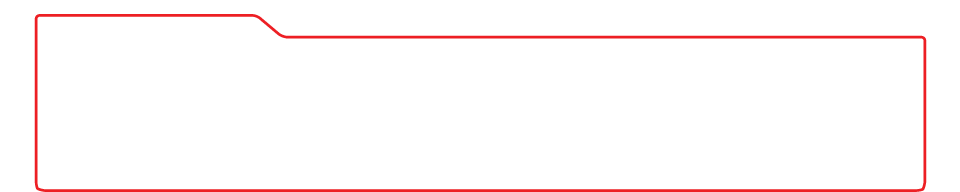
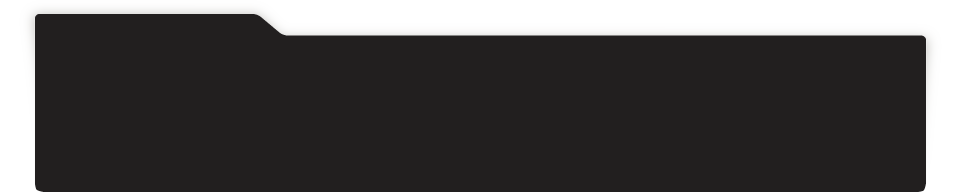
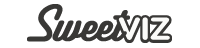
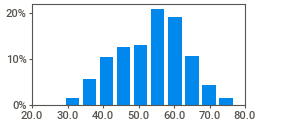
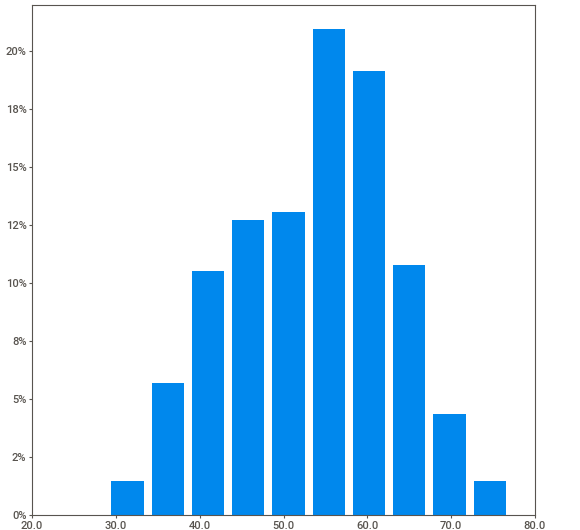
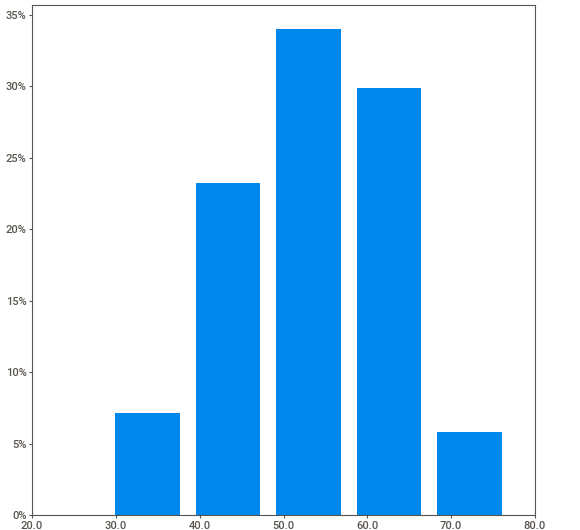
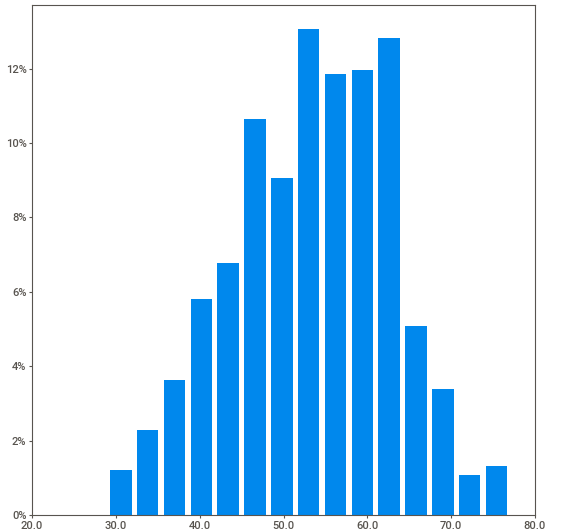
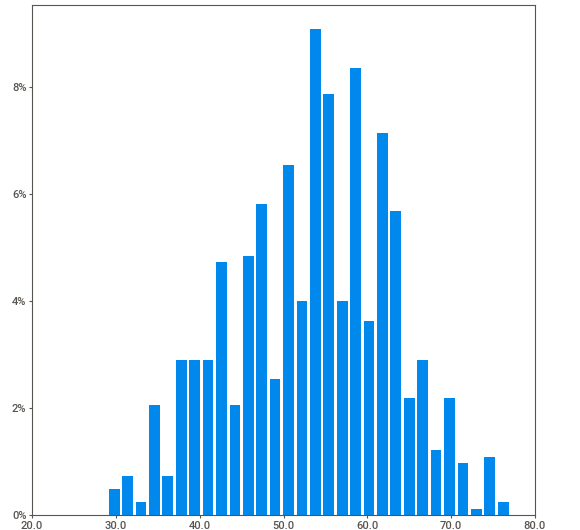
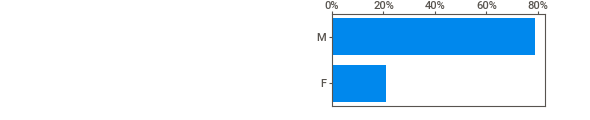
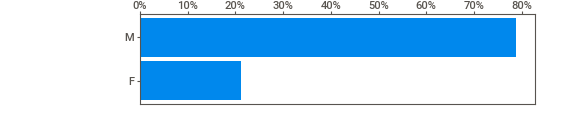
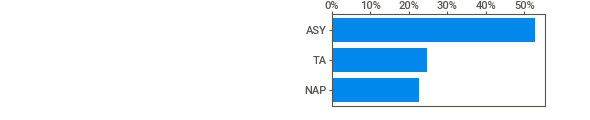
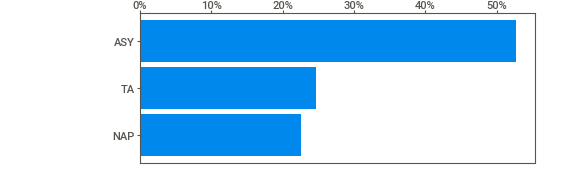
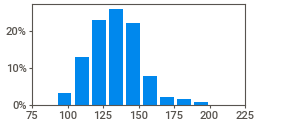
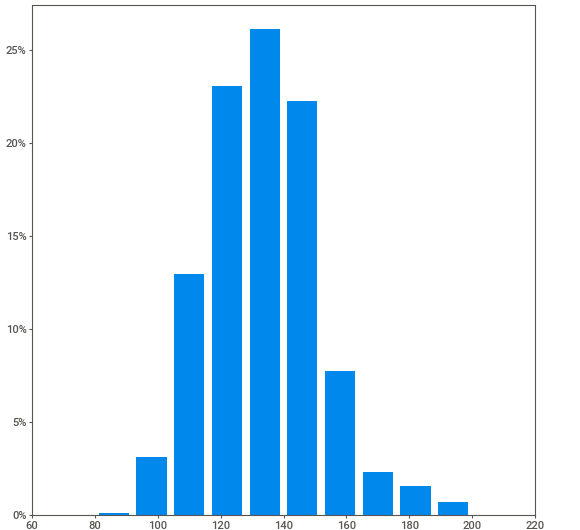
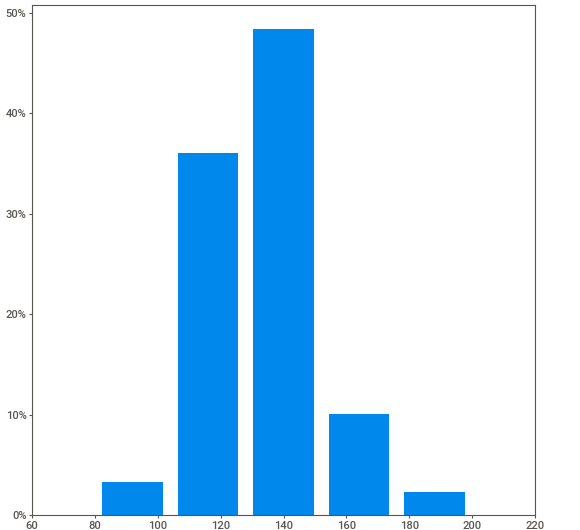
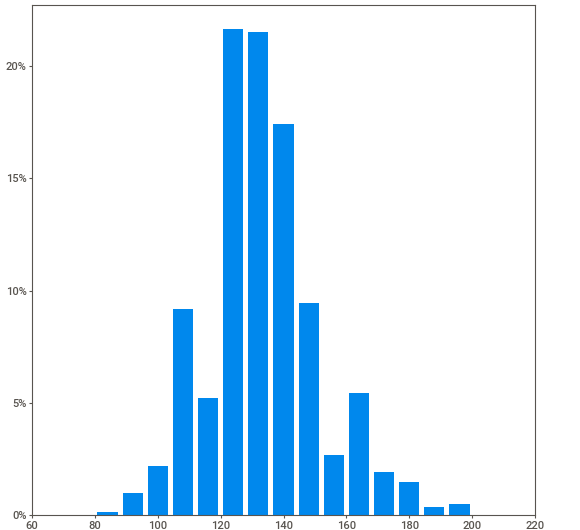
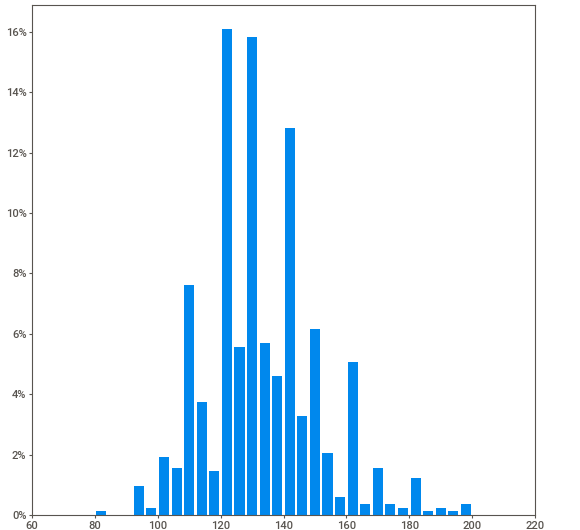
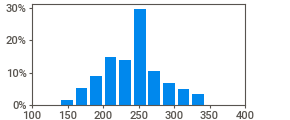
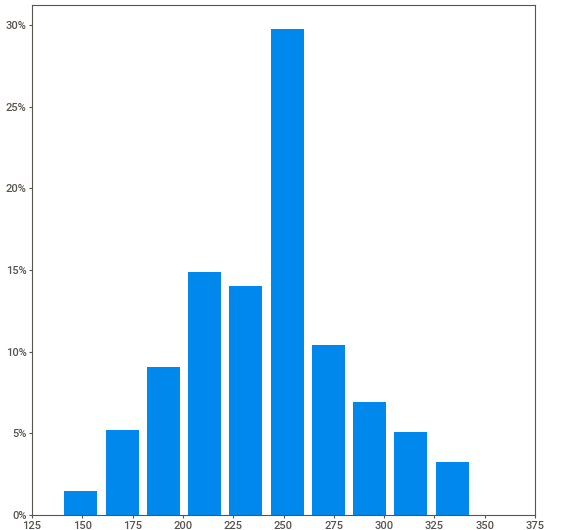
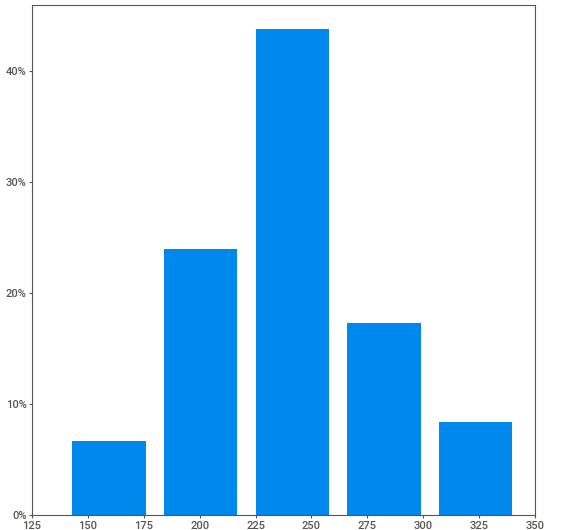
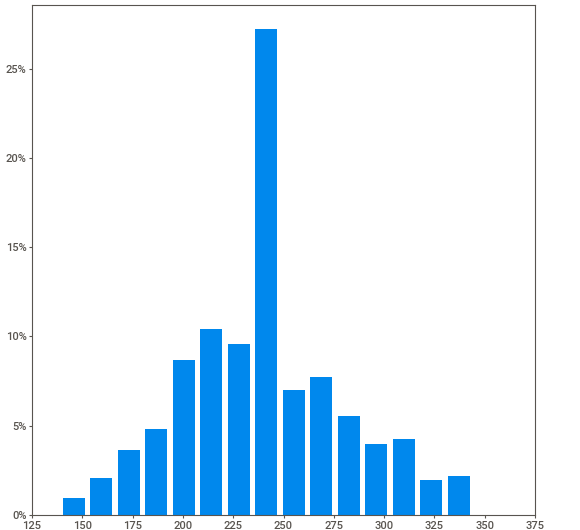
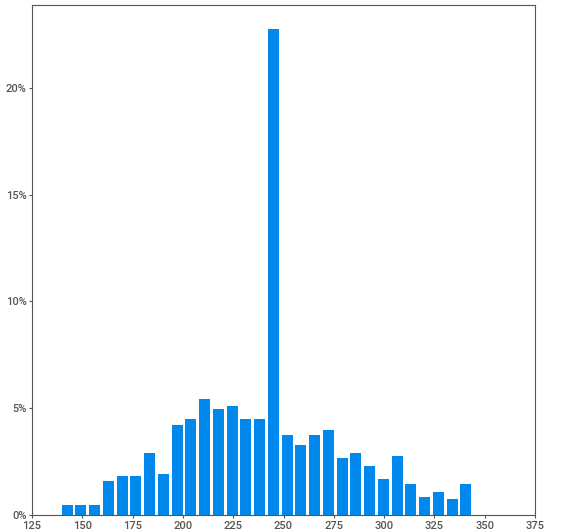
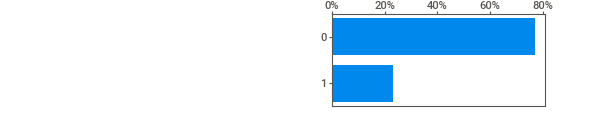
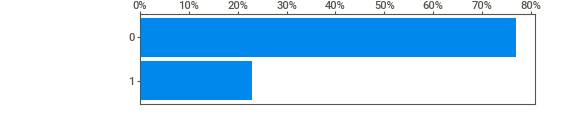
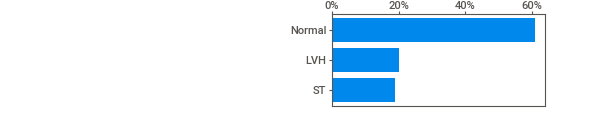
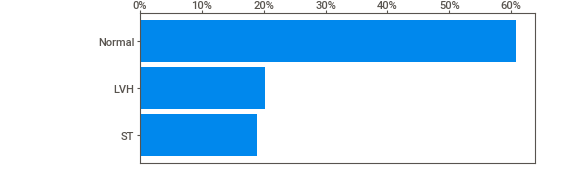
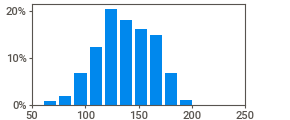
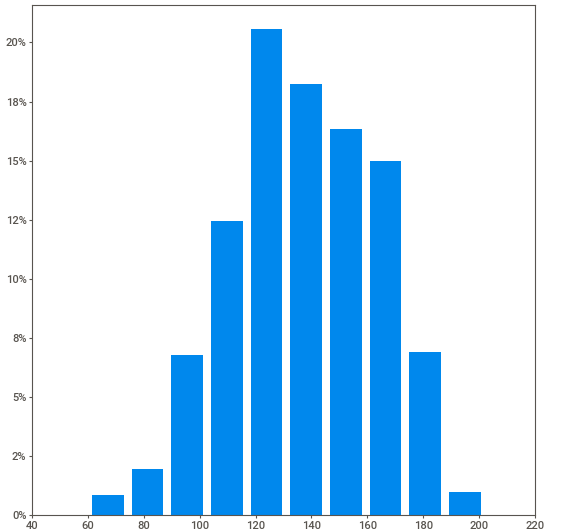
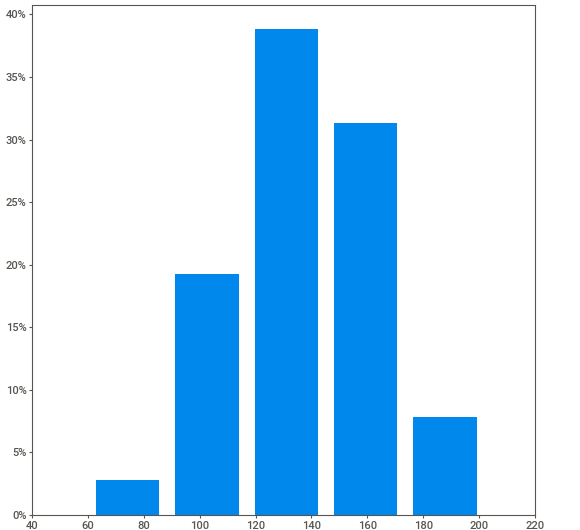
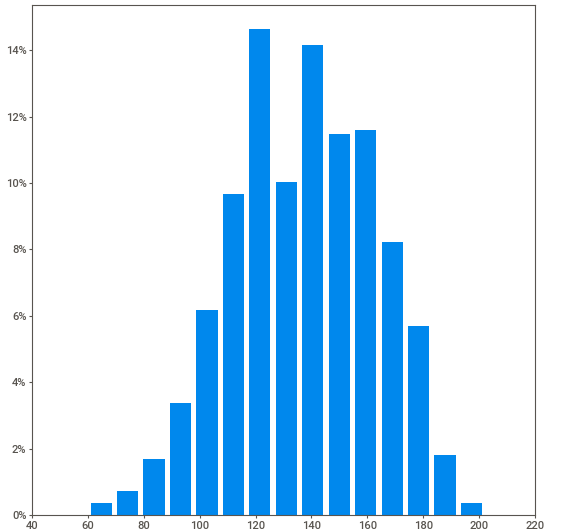
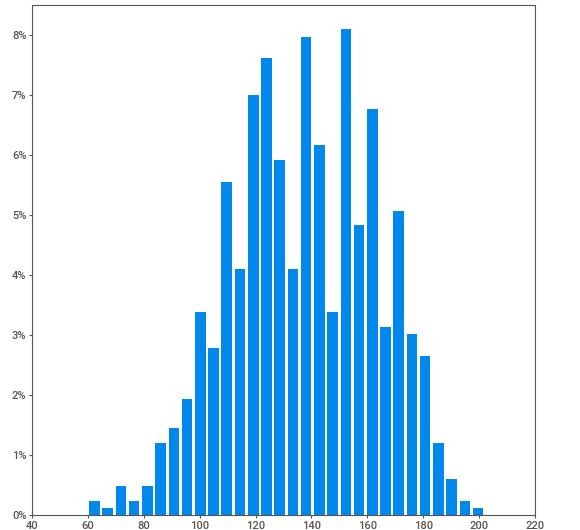
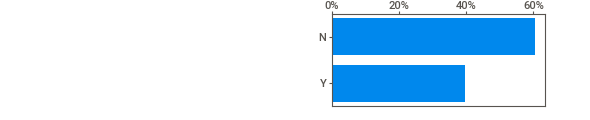
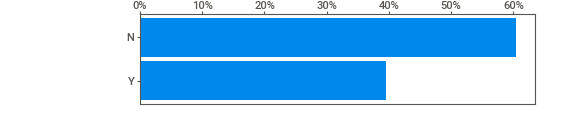
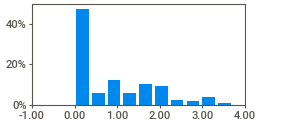
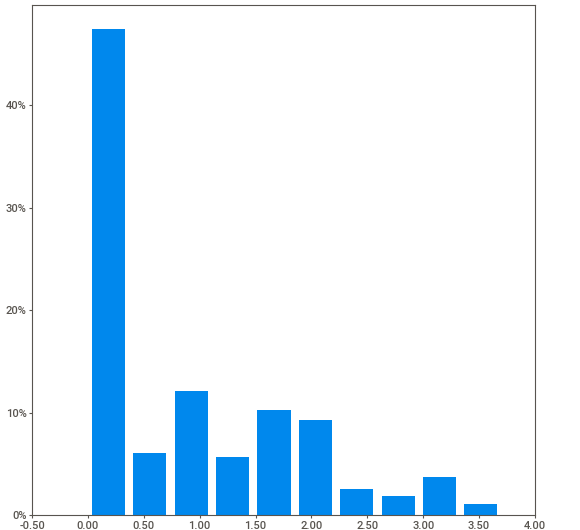
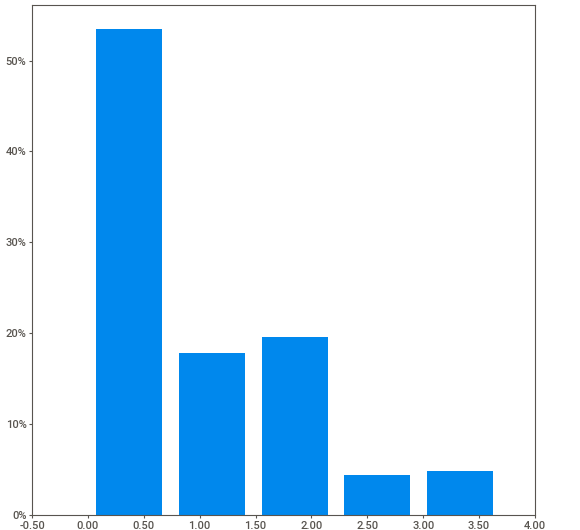
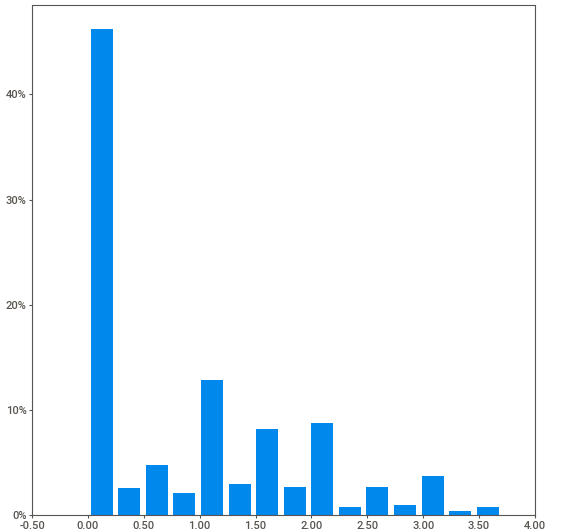
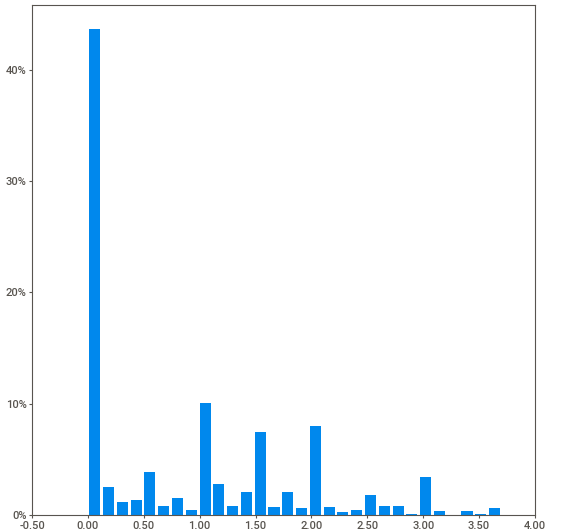
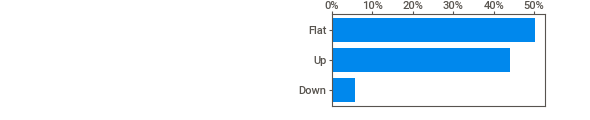
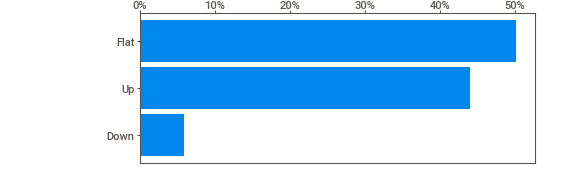
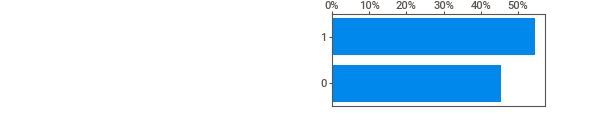
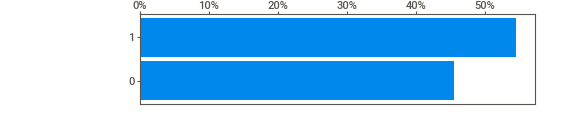
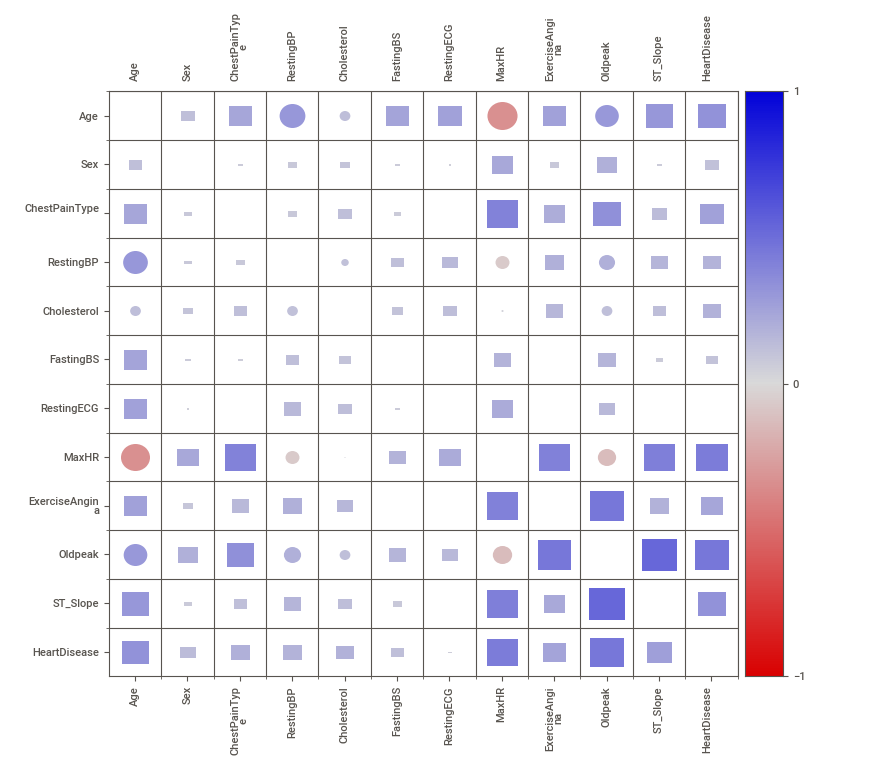
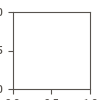

In [28]:
# Report setelah data dibersihkan
report = sweetviz.analyze([df, 'cleandata_penelaahan'])
report.show_notebook()
report

###### Berdasarkan hasil visualisasi di atas, diperoleh:
###### 1.) Sudah tidak ada missing value pada setiap variabel
###### 2.) Variabel Age, RestingBP, Cholesterol, dan MaxHR cenderung mengikuti distribusi normal
###### 3.) Variabel Oldpeak cenderung memiliki distribusi skew kanan
###### 4.) Perbdeaan proporsi antar kategori pada variabel kategorik tidak terlalu signifikan

In [29]:
# Saving the preprocessed Data for future use/analysis
df.to_csv("data/heart_PreProcessed.csv", encoding='utf8', index=False)

###### Pada line code diatas, saya menyimpan data yang sudah bersih ke dalam file data/heart_PreProcessed.csv

# 6 dan 7) Mengkonstruksi Data dan Menentukan Label Data

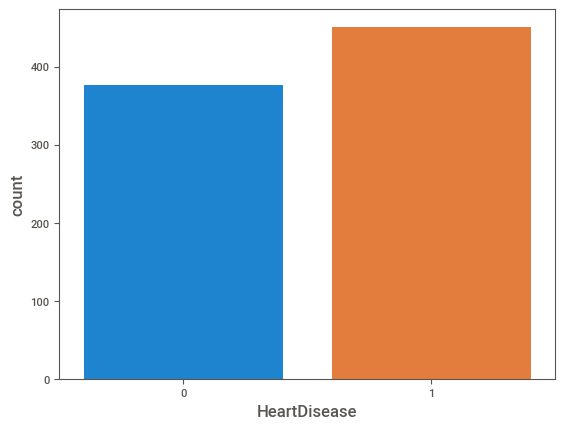

Counter({1: 451, 0: 376})
Heart Disease =  54.53446191051995 % Normal =  45.46553808948005 %


In [30]:
from collections import Counter

sns.countplot(data=df, x='HeartDisease')
plt.show()

D = Counter(df['HeartDisease'])
print(D)
print("Heart Disease = ", D[1]*100/(len(df['HeartDisease'])), '% Normal = ',D[0]*100/(len(df['HeartDisease'])) ,'%')

###### Berdasarkan diagram batang diatas, dapat dilihat bahwa proporsi antar kategorinya cukup seimbang dengan dengan kategori 'HeartDisease' sebesar 54,5% dan 'Normal' sebesar 45,5%. Hal ini menunjukkan bahwa data target kita sudah cukup baik untuk dilakukan di model klasifikasi nantinya.

In [31]:
# transformasi seluruh variabel kategorik
print(df.shape)
for col in df.select_dtypes('category').columns:
  if col != 'HeartDisease':
    transformasi = pd.get_dummies(df[col], prefix='')
    df = pd.concat([df, transformasi], axis = 1)
    # hapus variabel kategorik awal, sudah tidak diperlukan
    try:
      df.drop([col], axis=1, inplace=True)
    except Exception as err_:
      print(err_)

print(df.shape)
df.head()

(827, 12)
(827, 21)


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,_NAP,...,_0,_1,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
1,49.0,160.0,180.0,156,1.0,1,1,0,0,1,...,1,0,0,1,0,1,0,0,1,0
2,37.0,130.0,283.0,98,0.0,0,0,1,0,0,...,1,0,0,0,1,1,0,0,0,1
3,48.0,138.0,214.0,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54.0,150.0,195.0,122,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
5,39.0,120.0,339.0,170,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1


###### Pada line code di atas, saya melakukan One Hot Encoding, yakni dengan cara mengubah nilai pada setiap variabel kategori dengan nilai binary (0 dan 1).
###### Dapat dilihat pada output di atas, setelah saya melakukan One Hot Encoding jumlah kolom pada tabel saya bertambah menjadi 21 kolom, yang mana merupakan implikasi dari pengubahan nilai menjadi binary pada nilai variabel kategorik.

In [32]:
#membagi data menjadi train dan test
predictor = df.loc[:, ~df.columns.isin(['HeartDisease'])]
target = df['HeartDisease']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.3, random_state=50)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(578, 20) (578,)
(249, 20) (249,)


###### Pada line code di atas, saya melakukan split pada data menjadi training dan test yang nantinya akan berguna untuk keperluan evaluasi model.

# 8 dan 9) Membangun Model dan Mengevaluasi Hasil Pemodelan

###### Pada kali ini, saya akan mencoba untuk membandingkan model Regresi Logistik dan Decision tree untuk kasus klasifikasi seseorang berpenyakit jantung.

###### REGRESI LOGISTIK

In [33]:
#regresi logistik
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[ 93  17]
 [ 12 127]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       110
           1       0.88      0.91      0.90       139

    accuracy                           0.88       249
   macro avg       0.88      0.88      0.88       249
weighted avg       0.88      0.88      0.88       249



###### Berdasarkan output diatas, diperoleh:
###### 1.) Accuracy sebesar 0,88
###### 2.) Terdapat 93 orang yang terkena penyakit jantung diprediksi benar, terkena penyakit jantung
###### 3.) Terdapat 127 orang yang tidak terkena penyakit jantung diprediksi benar, tidak terkena penyakit jantung
###### 4.) Terdapat 17 orang yang tidak terkena penyakit jantung diprediksi terkena penyakit jantung (salah)
###### 5.) Terdapat 12 orang yang terkena penyakit jantung diprediksi tidak terkena penyakit jantung (salah)
###### 6.) Pada kasus deteksi penyakit ini, saya pertimbangkan metrik recall juga metrik yang penting dalam penentuan keputusan nanti, alasannya karena saya ingin menghindari kasus jika orang tersebut positif terkena penyakit  jantung tetapi diprediksi tidak terkena penyakit jantung. Karena nilai recall sudah cukup besar, maka model sudah cukup baik.
###### 7.) Nilai presisi sudah cukup besar, ini berarti kemungkinan saya mendapati kasus seseorang yang normal tetapi diprediksi terkena penyakit jantung relatif kecil.  
###### 8.) F1 score sudah cukup besar, ini berarti model saya memiliki keseimbangan yang baik antara presisi dan recall.

In [34]:
# Mendapatkan nama fitur
nama_fitur = xTrain.columns.tolist()  # Ganti dengan nama kolom fitur dari DataFrame Anda

# Menampilkan koefisien (bobot) untuk setiap fitur dengan nama fitur
for idx, nama in enumerate(nama_fitur):
    print(f"{nama}: {reglog.coef_[0][idx]}")  # reglog.coef_[0] untuk kelas pertama, ganti dengan indeks kelas yang diinginkan

Age: 0.013581160716745899
RestingBP: 0.0019667758181549488
Cholesterol: 0.007538174355688615
MaxHR: -0.014621445815245599
Oldpeak: 0.2346661917245899
_F: -0.8708482116454331
_M: 0.5790975060286684
_ASY: 1.0067343160881543
_NAP: -0.6998287085253433
_TA: -0.5986563131842855
_0: -0.7770513697482003
_1: 0.48530066412271666
_LVH: 0.1196383679883897
_Normal: -0.16328417997651473
_ST: -0.24810489363236252
_N: -0.605186017225584
_Y: 0.31343531160683147
_Down: -0.20231285613958727
_Flat: 1.0802776466258686
_Up: -1.1697154961028144


###### Pada line code di atas, saya ingin menampilkan koefisien dari masing-masing variabel pada persamaan regresi logistik.

In [35]:
#cross validation untuk regresi logistik
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.85 (+/- 0.11), Waktu = 0.913 detik


Variasi akurasi dari model cukup rendah, yakni hanya +/- 0.11

RegLog    0.719512
dtype: float64

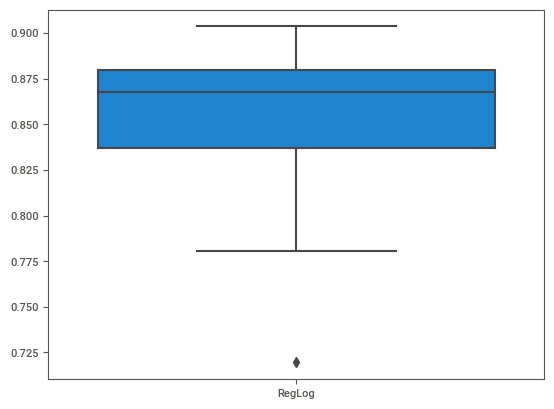

In [36]:
#boxplot hasil akurasi dari cross validation
df_ = pd.DataFrame({'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

###### Dari boxplot di atas, diperoleh:
###### 1.) Nilai akurasi maksimum pada hasil cross validation sebelumnya adalah sekitar 0,901
###### 2.) Nilai akurasi minimum pada hasil cross validation sebelumnya adalah sekitar 0,780
###### 3.) Median dari nilai akurasi pada hasil cross validation sebelumnya adalah sekitar 0,870
###### 4.) Q1 dari nilai akurasi pada hasil cross validation sebelumnya adalah sekitar 0,830
###### 5.) Q3 dari nilai akurasi pada hasil cross validation sebelumnya adalah sekitar 0,880
###### 6.) Terdapat satu iterasi yang menghasilkan nilai akurasi outlier, yakni sekitar 0,720

###### Decision Tree

In [ ]:
# Decision Tree
DT = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[ 86  24]
 [ 35 104]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       110
           1       0.81      0.75      0.78       139

    accuracy                           0.76       249
   macro avg       0.76      0.77      0.76       249
weighted avg       0.77      0.76      0.76       249



###### Berdasarkan output diatas, diperoleh:
###### 1.) Accuracy sebesar 0,76
###### 2.) Terdapat 86 orang yang terkena penyakit jantung diprediksi benar, terkena penyakit jantung
###### 3.) Terdapat 104 orang yang tidak terkena penyakit jantung diprediksi benar, tidak terkena penyakit jantung
###### 4.) Terdapat 24 orang yang tidak terkena penyakit jantung diprediksi terkena penyakit jantung (salah)
###### 5.) Terdapat 35 orang yang terkena penyakit jantung diprediksi tidak terkena penyakit jantung (salah)
###### 6.) Pada kasus deteksi penyakit ini, saya pertimbangkan metrik recall juga metrik yang penting dalam penentuan keputusan nanti, alasannya karena saya ingin menghindari kasus jika orang tersebut positif terkena penyakit  jantung tetapi diprediksi tidak terkena penyakit jantung. Karena nilai recall sudah cukup besar, maka model sudah cukup baik.
###### 7.) Nilai presisi sudah cukup besar, ini berarti kemungkinan saya mendapati kasus seseorang yang normal tetapi diprediksi terkena penyakit jantung relatif kecil.  
###### 8.) F1 score sudah cukup besar, ini berarti model saya memiliki keseimbangan yang baik antara presisi dan recall.

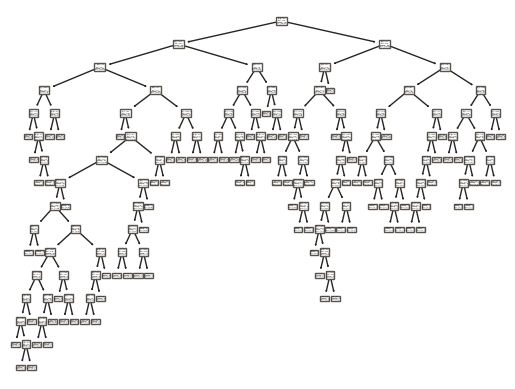

In [ ]:
# visualisasi tree

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(xTrain, yTrain)
p = tree.plot_tree(clf)

###### Pada line code di atas, saya mencoba membuat visualisasi dari decision tree

In [ ]:
def DT_feature_importance(x_train,y_train):
  # get the importance of the resulting features.
  importances = DT.feature_importances_

  # create a data frame for visualization.
  final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
  final_df.set_index('Importances')

  # sort in descending order
  final_df = final_df.sort_values('Importances',ascending=False)

  #visualising feature importance
  pd.Series(DT.feature_importances_, index=x_train.columns).nlargest(10).plot(kind='barh', title='Decison Tree Feature Importance')
  return final_df

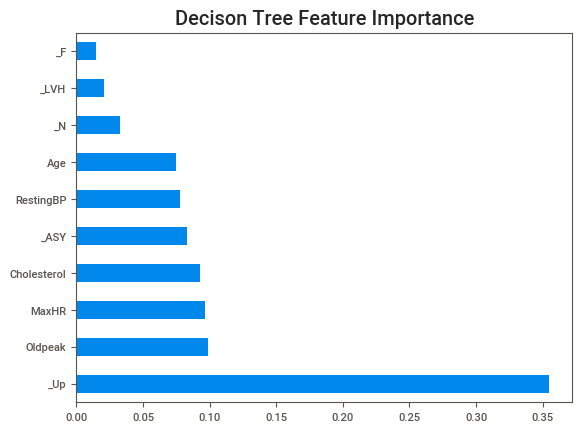

In [ ]:
feature_importance = DT_feature_importance(xTrain, yTrain)

###### Fitur terpenting pada model ini adalah fitur UP pada variabel ST_Slope, yakni sebesar 0,35

In [ ]:
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.80 (+/- 0.12), Waktu = 0.083 detik


###### Variasi dari model cukup rendah, yakni hanya +/- 0.12

DecTree    0.670732
dtype: float64

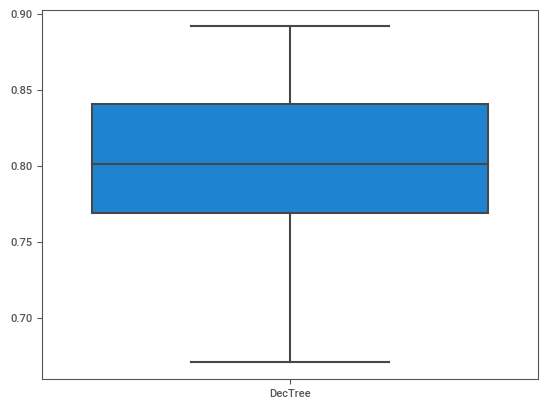

In [ ]:
#boxplot hasil akurasi dari cross validation
df_ = pd.DataFrame({'DecTree': scores_dt})
p = sns.boxplot(data = df_)
df_.min()

###### Dari boxplot di atas, diperoleh:
###### 1.) Nilai akurasi maksimum pada hasil cross validation sebelumnya adalah sekitar 0,89
###### 2.) Nilai akurasi minimum pada hasil cross validation sebelumnya adalah sekitar 0,67
###### 3.) Median dari nilai akurasi pada hasil cross validation sebelumnya adalah sekitar 0,81
###### 4.) Q1 dari nilai akurasi pada hasil cross validation sebelumnya adalah sekitar 0,77
###### 5.) Q3 dari nilai akurasi pada hasil cross validation sebelumnya adalah sekitar 0,89

RegLog     0.719512
DecTree    0.670732
dtype: float64

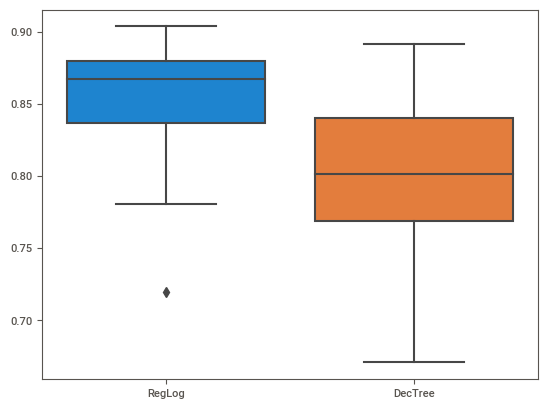

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt})
p = sns.boxplot(data = df_)
df_.min()

###### Berdasarkan perbandingan boxplot antara kedua model diatas, model regresi logistik memiliki akurasi yang lebih tinggi dan juga variabilitas yang lebih rendah daripada model decision tree. Namun, terdapat iterasi yang menjadi outlier di model regresi logistik.

In [ ]:
# Optimal parameter Regresi Logistik
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'class_weight':[None, 'balanced']}]

grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)
grid_search.fit(xTrain, yTrain)

print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
0.8529835082458771
{'solver': 'lbfgs'}


###### Berdasarkan output diatas, diperoleh parameter yang paling optimal untuk model regresi logistik adalah {'solver': 'lbfgs'} dengan akurasi sebesar 0.8529835082458771

In [ ]:
# Optimal parameter Desion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(1, 25)}
dtree_model=DecisionTreeClassifier()
dtree_gscv = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(xTrain, yTrain)

print(dtree_gscv.best_score_)
print(dtree_gscv.best_params_)

0.8391409558378704
{'max_depth': 3, 'criterion': 'gini'}


###### Berdasarkan output diatas, diperoleh parameter yang paling optimal untuk model decision tree adalah parameter {'max_depth': 3} dan parameter {'criterion': 'entropy'} dengan akurasi sebesar 0.8391409558378704

###### Berdasarkan uraian yang telah dijabarkan, maka penggunaan model regresi logistik lebih disarankan untuk pendeteksian penyakit jantung daripada model decision tree. Karena model regresi logistik memiliki akurasi yang lebih besar dan variabilitas yang lebih kecil.

In [41]:
# Contoh data baru dalam bentuk DataFrame pandas
data_baru = pd.DataFrame({
    'Age': [47],
    'RestingBP': [100],
    'Cholesterol': [190],
    'MaxHR': [120],
    'Oldpeak': [2.0],
    '_F': [0],
    '_M': [1],
    '_ASY': [0],
    '_NAP': [0],
    '_TA': [1],
    '_0': [1],
    '_1': [0],
    '_LVH': [0],
    '_Normal': [1],
    '_ST': [0],
    '_N': [1],
    '_Y': [0],
    '_Down': [0],
    '_Flat': [0],
    '_Up': [1],
})

# Melakukan prediksi dengan model Regresi Logistik yang sudah dilatih
prediksi_data_baru = reglog.predict(data_baru)
print("Hasil Prediksi:", prediksi_data_baru)

Hasil Prediksi: [0]


###### Pada line code di atas saya melakukan pengujian prediksi untuk data baru menggunakan regresi logistik. Berdasarkan output di atas, diperoleh prediksi 0 atau Normal